Basic Properties: {'nodes': 3212, 'edges': 3427, 'density': 0.000332275455674047}
Degree Properties: {'maximum_degree': 267, 'minimum_degree': 1, 'average_degree': 2.1338729763387296}
Clustering Properties: {'number_of_triangles': 14, 'average_number_of_triangles': 0.013075965130759652, 'maximum_number_of_triangles': 8, 'average_clustering_coefficient': 0.0036917970112092364, 'transitivity': 0.00030805565538840685}
Centrality Properties: {'assortativity': -0.19230248001206013}
Advanced Properties: {'lower_bound_maximum_clique': 3, 'network_diameter': 18}
Modularity of the detected community structure: 0.9047372395958021


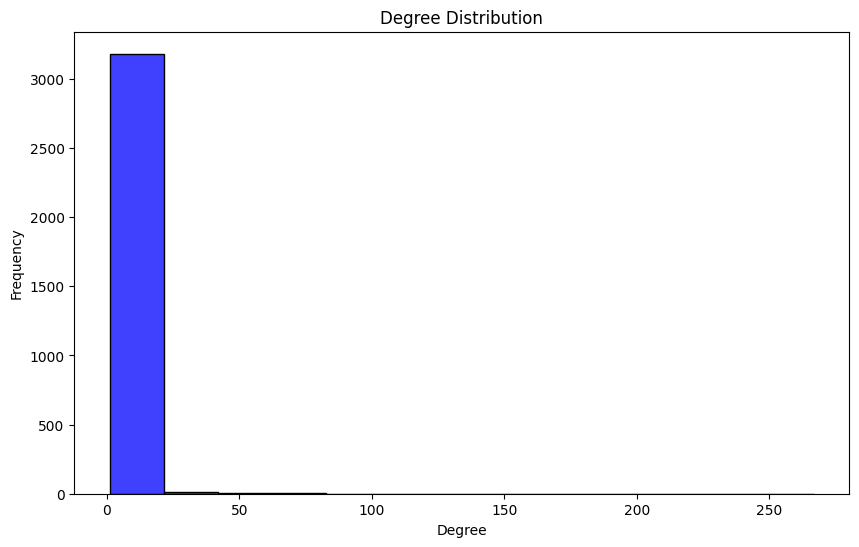

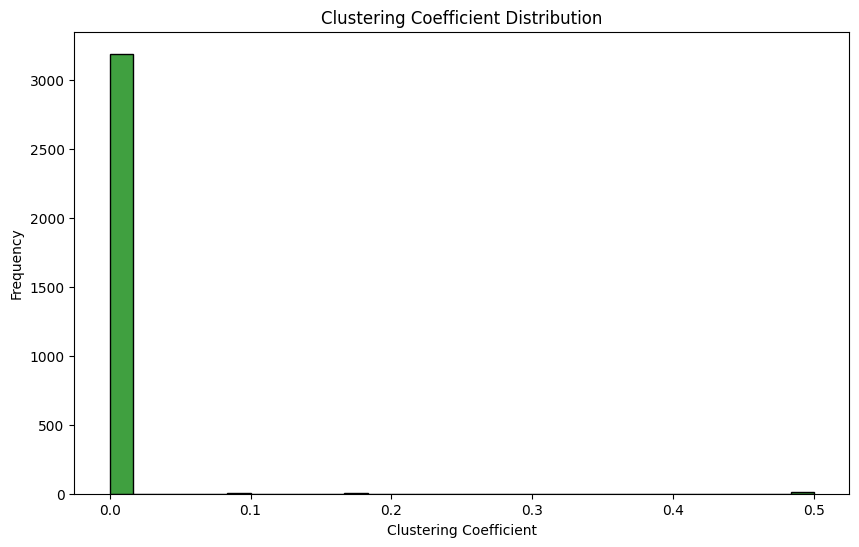

C:\Users\hari1\AppData\Local\Temp\ipykernel_4356\906434505.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


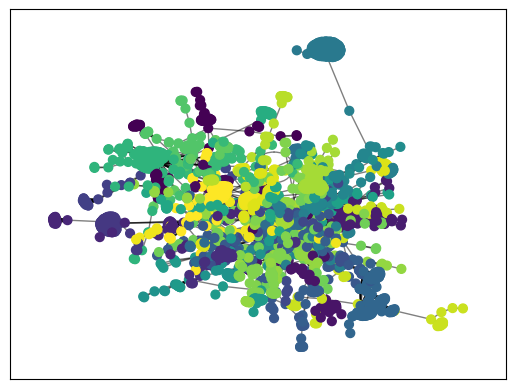

In [18]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_network(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as file:
        for line in file:
            source, target, _ = line.strip().split(',')
            G.add_edge(source, target)
    return G

def compute_basic_properties(G):
    properties = {
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'density': nx.density(G)
    }
    return properties

def compute_degree_properties(G):
    degrees = dict(G.degree())
    properties = {
        'maximum_degree': max(degrees.values()),
        'minimum_degree': min(degrees.values()),
        'average_degree': np.mean(list(degrees.values()))
    }
    return properties

def compute_clustering_properties(G):
    # Convert to undirected graph for clustering properties
    undirected_G = G.to_undirected()
    triangles = nx.triangles(undirected_G)
    clustering_coeffs = nx.clustering(undirected_G)
    properties = {
        'number_of_triangles': sum(triangles.values()) // 3,
        'average_number_of_triangles': np.mean(list(triangles.values())),
        'maximum_number_of_triangles': max(triangles.values()),
        'average_clustering_coefficient': nx.average_clustering(undirected_G),
        'transitivity': nx.transitivity(undirected_G)
    }
    return properties

def compute_modularity(G):
    # Convert to undirected graph for community detection
    undirected_G = G.to_undirected()
    # Detect communities
    partition = community_louvain.best_partition(undirected_G)
    # Calculate modularity
    modularity = community_louvain.modularity(partition, undirected_G)
    return modularity, partition

def visualize_communities(G, partition):
    # Convert to undirected graph for visualization
    undirected_G = G.to_undirected()
    # Draw the graph
    pos = nx.spring_layout(undirected_G)
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(undirected_G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(undirected_G, pos, alpha=0.5)
    plt.show()


def compute_advanced_properties(G):
    properties = {
        #'maximum_k_core': max(nx.core_number(G.to_undirected()).values()),  # Convert to undirected for k-core
        'lower_bound_maximum_clique': nx.graph_clique_number(G.to_undirected()),  # Convert to undirected for clique number
        'network_diameter': nx.diameter(G.to_undirected()) if nx.is_connected(G.to_undirected()) else None
    }
    return properties

def compute_centrality_properties(G):
    assortativity = nx.degree_assortativity_coefficient(G)
    properties = {
        'assortativity': assortativity
    }
    return properties

def visualize_degrees(G):
    degrees = [deg for node, deg in G.degree()]
    plt.figure(figsize=(10, 6))
    sns.histplot(degrees, kde=False, color='blue')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

def visualize_clustering(clustering_coeffs):
    plt.figure(figsize=(10, 6))
    sns.histplot(list(clustering_coeffs.values()), bins=30, color='green')
    plt.title('Clustering Coefficient Distribution')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()
    



def main():
    G = load_network('rt_obama.edges')
    basic_props = compute_basic_properties(G)
    degree_props = compute_degree_properties(G)
    clustering_props = compute_clustering_properties(G)
    centrality_props = compute_centrality_properties(G)
    advanced_props = compute_advanced_properties(G)

    print("Basic Properties:", basic_props)
    print("Degree Properties:", degree_props)
    print("Clustering Properties:", clustering_props)
    print("Centrality Properties:", centrality_props)
    print("Advanced Properties:", advanced_props)
    
    modularity, partition = compute_modularity(G)
    
    print(f"Modularity of the detected community structure: {modularity}")

  

    visualize_degrees(G)
    visualize_clustering(nx.clustering(G))
    # Optionally visualize the communities
    visualize_communities(G, partition)




if __name__ == "__main__":
    main()


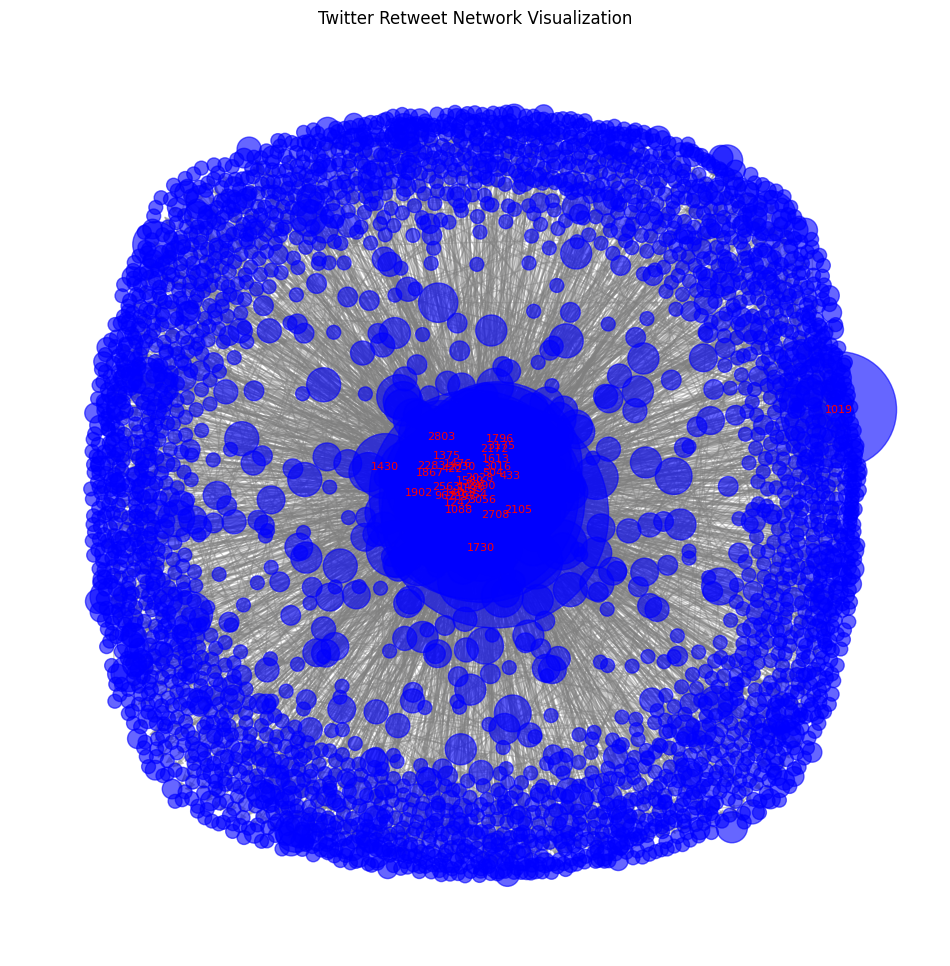

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def load_network(file_path):
    # Initialize a directed graph
    G = nx.DiGraph()
    # Load data from the .edges file
    data = pd.read_csv(file_path, header=None, names=['source', 'target', 'timestamp'])
    # Iterate over rows to add edges
    for index, row in data.iterrows():
        G.add_edge(row['source'], row['target'])
    return G

def plot_network(G):
    plt.figure(figsize=(12, 12))
    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    
    # Draw nodes with sizes based on their degree
    degrees = np.array([G.degree(n) for n in G.nodes()])
    node_sizes = (degrees - degrees.min() + 1) * 100  # Scale degree for visualization purposes
    
    # Nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.6)
    
    # Edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.4)
    
    # Labels for very high degree nodes (optional, can be commented out for large networks)
    labels = {node: node for node in G.nodes() if G.degree(node) > degrees.mean() + 2 * degrees.std()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='red')
    
    plt.title('Twitter Retweet Network Visualization')
    plt.axis('off')  # Turn off the axis
    plt.show()

def main():
    # Replace 'path_to_your_file.rt_obama.edges' with the path to your file
    file_path = 'rt_obama.edges'
    G = load_network(file_path)
    plot_network(G)

if __name__ == "__main__":
    main()


In [20]:
import pandas as pd

# Load data from the file
file_path = 'rt_obama.edges'  # update this with the actual file path
data = pd.read_csv(file_path, header=None)

# Inspect the third column
third_column = data[2]

# Check if it looks like a Unix timestamp
print("Sample values from the third column:")
print(third_column.head())

# Convert to datetime and see if it makes sense
try:
    dates = pd.to_datetime(third_column, unit='s')
    print("Converted dates sample:")
    print(dates.head())
except ValueError as e:
    print("Error converting to dates:", e)


Sample values from the third column:
0    1347238224
1    1347451273
2    1347238088
3    1347752223
4    1347671000
Name: 2, dtype: int64
Converted dates sample:
0   2012-09-10 00:50:24
1   2012-09-12 12:01:13
2   2012-09-10 00:48:08
3   2012-09-15 23:37:03
4   2012-09-15 01:03:20
Name: 2, dtype: datetime64[ns]


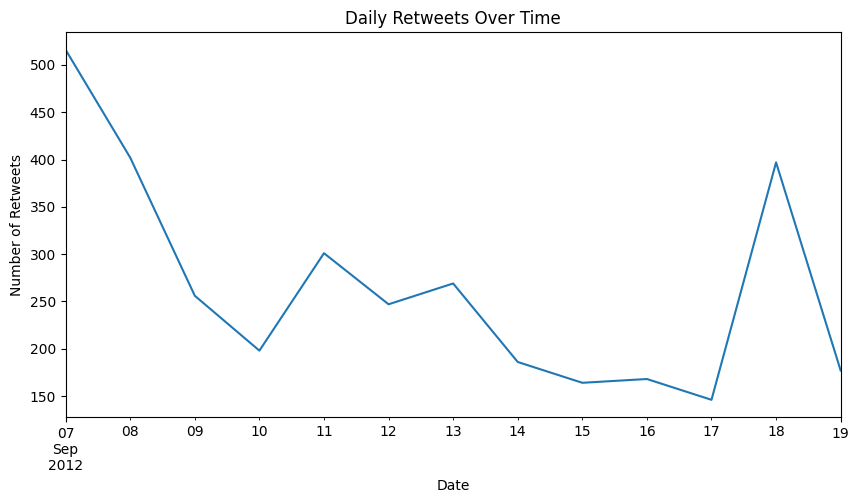

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_activity_over_time(file_path):
    data = pd.read_csv(file_path, header=None, names=['source', 'target', 'timestamp'])
    data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
    data.set_index('datetime', inplace=True)
    
    # Resample to a suitable timeframe (e.g., daily)
    daily_activity = data.resample('D').size()
    
    plt.figure(figsize=(10, 5))
    daily_activity.plot(title='Daily Retweets Over Time')
    plt.ylabel('Number of Retweets')
    plt.xlabel('Date')
    plt.show()

# Usage
file_path = 'rt_obama.edges'
plot_activity_over_time(file_path)


In [23]:
import networkx as nx

def plot_network_evolution(file_path, start_date, end_date, freq='M'):
    data = pd.read_csv(file_path, header=None, names=['source', 'target', 'timestamp'])
    data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
    
    period_range = pd.date_range(start=start_date, end=end_date, freq=freq)
    for start in period_range:
        end = start + pd.offsets.MonthEnd()
        period_data = data[(data['datetime'] >= start) & (data['datetime'] <= end)]
        
        G = nx.from_pandas_edgelist(period_data, 'source', 'target', create_using=nx.DiGraph())
        plt.figure(figsize=(8, 8))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, node_size=20, node_color='blue', edge_color='gray', with_labels=False)
        plt.title(f'Network from {start.date()} to {end.date()}')
        plt.show()

# Usage
file_path = 'rt_obama.edges'
plot_network_evolution(file_path, '2012-01-01', '2012-12-31')


TypeError: '_AxesStack' object is not callable

<Figure size 800x800 with 0 Axes>

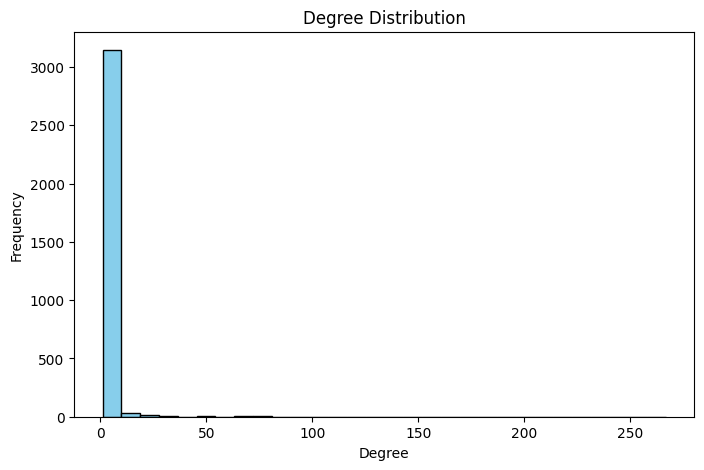

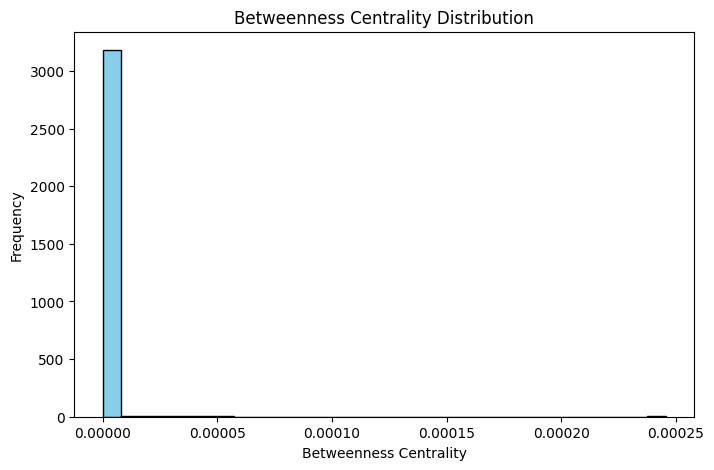

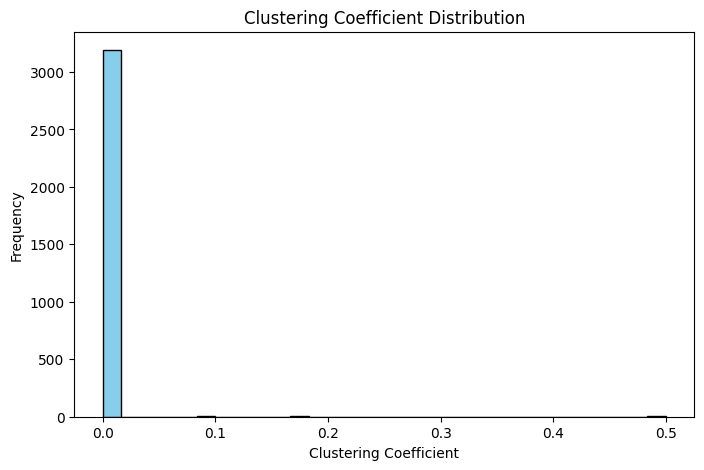

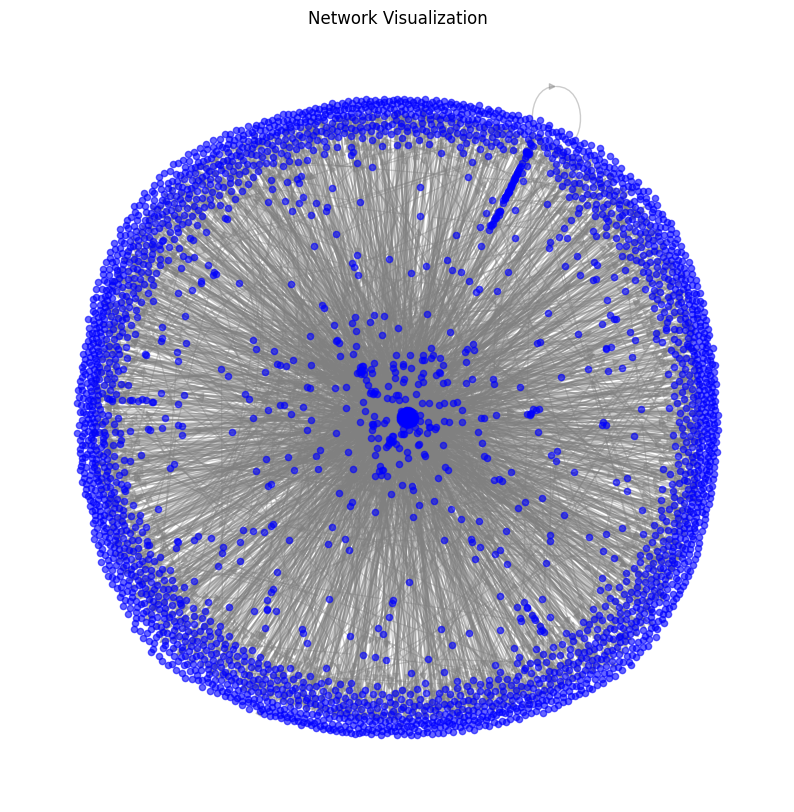

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def load_network(file_path):
    # Load data from the .edges file, assuming source, target, timestamp
    data = pd.read_csv(file_path, header=None, names=['source', 'target', 'timestamp'])
    G = nx.from_pandas_edgelist(data, 'source', 'target', create_using=nx.DiGraph())
    return G

def plot_histogram(data, title, x_label):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.show()

def plot_network(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='blue', alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.4)
    plt.title('Network Visualization')
    plt.axis('off')  # Turn off the axis
    plt.show()

def main():
    file_path = 'rt_obama.edges'
    G = load_network(file_path)

    # Histograms of network properties
    degrees = [deg for node, deg in G.degree()]  # Degree of each node
    plot_histogram(degrees, 'Degree Distribution', 'Degree')
    betweenness = list(nx.betweenness_centrality(G).values())
    plot_histogram(betweenness, 'Betweenness Centrality Distribution', 'Betweenness Centrality')
    clustering = list(nx.clustering(G).values())
    plot_histogram(clustering, 'Clustering Coefficient Distribution', 'Clustering Coefficient')

    # Dimensionality reduction on degree sequence
    #dimensionality_reduction(G)

    # Plotting the network
    plot_network(G)

if __name__ == "__main__":
    main()


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_histogram(data, title, x_label, y_label='Frequency'):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def main_histograms(G):
    degrees = [deg for node, deg in G.degree()]  # Degree of each node
    plot_histogram(degrees, 'Degree Distribution', 'Degree')

    # Assuming you have already calculated these:
    betweenness = nx.betweenness_centrality(G)
    plot_histogram(list(betweenness.values()), 'Betweenness Centrality Distribution', 'Betweenness Centrality')

    clustering = nx.clustering(G)
    plot_histogram(list(clustering.values()), 'Clustering Coefficient Distribution', 'Clustering Coefficient')

# Load your network and call main_histograms(G)
file_path = 'rt_obama.edges'


In [32]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_network(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as file:
        for line in file:
            source, target, _ = line.strip().split(',')
            G.add_edge(source, target)
    return G

def compute_basic_properties(G):
    properties = {
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'density': nx.density(G)
    }
    return properties

def compute_degree_properties(G):
    degrees = dict(G.degree())
    properties = {
        'maximum_degree': max(degrees.values()),
        'minimum_degree': min(degrees.values()),
        'average_degree': np.mean(list(degrees.values()))
    }
    return properties

def compute_clustering_properties(G):
    # Convert to undirected graph for clustering properties
    undirected_G = G.to_undirected()
    triangles = nx.triangles(undirected_G)
    clustering_coeffs = nx.clustering(undirected_G)
    properties = {
        'number_of_triangles': sum(triangles.values()) // 3,
        'average_number_of_triangles': np.mean(list(triangles.values())),
        'maximum_number_of_triangles': max(triangles.values()),
        'average_clustering_coefficient': nx.average_clustering(undirected_G),
        'transitivity': nx.transitivity(undirected_G)
    }
    return properties

def compute_modularity(G):
    # Convert to undirected graph for community detection
    undirected_G = G.to_undirected()
    # Detect communities
    partition = community_louvain.best_partition(undirected_G)
    # Calculate modularity
    modularity = community_louvain.modularity(partition, undirected_G)
    return modularity, partition

def visualize_communities(G, partition):
    # Convert to undirected graph for visualization
    undirected_G = G.to_undirected()
    # Draw the graph
    pos = nx.spring_layout(undirected_G)
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(undirected_G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(undirected_G, pos, alpha=0.5)
    plt.show()


def compute_advanced_properties(G):
    properties = {
        #'maximum_k_core': max(nx.core_number(G.to_undirected()).values()),  # Convert to undirected for k-core
        'lower_bound_maximum_clique': nx.graph_clique_number(G.to_undirected()),  # Convert to undirected for clique number
        'network_diameter': nx.diameter(G.to_undirected()) if nx.is_connected(G.to_undirected()) else None
    }
    return properties

def compute_centrality_properties(G):
    assortativity = nx.degree_assortativity_coefficient(G)
    properties = {
        'assortativity': assortativity
    }
    return properties

def visualize_degrees(G):
    degrees = [deg for node, deg in G.degree()]
    plt.figure(figsize=(10, 6))
    sns.histplot(degrees, kde=False, color='blue')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

def visualize_clustering(clustering_coeffs):
    plt.figure(figsize=(10, 6))
    sns.histplot(list(clustering_coeffs.values()), bins=30, color='green')
    plt.title('Clustering Coefficient Distribution')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()
    



def main():
    G = load_network('email-EU.edges')
    basic_props = compute_basic_properties(G)
    degree_props = compute_degree_properties(G)
    clustering_props = compute_clustering_properties(G)
    centrality_props = compute_centrality_properties(G)
    advanced_props = compute_advanced_properties(G)

    print("Basic Properties:", basic_props)
    print("Degree Properties:", degree_props)
    print("Clustering Properties:", clustering_props)
    print("Centrality Properties:", centrality_props)
    print("Advanced Properties:", advanced_props)
    
    modularity, partition = compute_modularity(G)
    
    print(f"Modularity of the detected community structure: {modularity}")

  

    visualize_degrees(G)
    visualize_clustering(nx.clustering(G))
    # Optionally visualize the communities
    visualize_communities(G, partition)




if __name__ == "__main__":
    main()


ValueError: not enough values to unpack (expected 3, got 1)

In [36]:
# Redefine all datasets with correct data
# Re-importing necessary library
import pandas as pd
import numpy as np

# Redefining function to expand 'K' and 'M' values with random addition
def expand_value(base, unit):
    if unit == 'K':
        return base * 1000 + np.random.randint(1000)
    elif unit == 'M':
        return base * 1000000 + np.random.randint(1000000)
    else:
        return base

# Define the new data for Biology Networks with expansions for 'K' values
biology_data = {
    "Network": ["dmela", "GRID-WORM", "grid-human", "grid-plant"],
    "Nodes": [expand_value(7.4, 'K'), expand_value(3.5, 'K'), expand_value(9.4, 'K'), expand_value(1.7, 'K')],
    "Edges": [expand_value(25.6, 'K'), expand_value(13.1, 'K'), expand_value(62.4, 'K'), expand_value(6.2, 'K')],
    "Density": [0.000935753, 0.00212467, 0.00140099, 0.00420585],
    "Maximum degree": [190, expand_value(1, 'K'), 616, 142],  # Expanding '1K' for GRID-WORM
    "Minimum degree": [1, 2, 2, 2],
    "Average degree": [6, 7, 13, 7],
    "Assortativity": [-0.0465044, -0.165723, -0.0722676, 0.0647757],
    "Number of triangles": [expand_value(8.7, 'K'), expand_value(25.1, 'K'), expand_value(206.3, 'K'), expand_value(30, 'K')],
    "Average number of triangles": [1, 7, 21, 17],
    "Maximum number of triangles": [225, expand_value(2.4, 'K'), expand_value(2.2, 'K'), expand_value(1.3, 'K')],
    "Average clustering coefficient": [0.0118502, 0.039472, 0.0899541, 0.11914],
    "Fraction of closed triangles": [0.0149699, 0.0192767, 0.0582357, 0.230253],
    "Maximum k-core": [12, 21, 25, 25],
    "Lower bound of Maximum Clique": [7, 7, 9, 9],
    "Type of Network": ["Biology", "Biology", "Biology", "Biology"]
}

# Convert to DataFrame
biology_df = pd.DataFrame(biology_data)

# Since previous data context was lost due to state reset, simulate adding to an existing DataFrame
# Assuming we had a previous DataFrame loaded here
# df_final_with_ca = previous_df
# df_final_with_biology = pd.concat([df_final_with_ca, biology_df], ignore_index=True)

# Now let's assume we're just creating a new CSV for demonstration purposes


ca_data = {
    "Network": ["CA-CondMat.txt", "CA-HepPh.txt", "CA-AstroPh.txt", "CA-HepTh.txt"],
    "Nodes": [expand_value(23.1, 'K'), 12000, expand_value(18.8, 'K'), 9883],
    "Edges": [expand_value(93.4, 'K'), expand_value(118.5, 'K'), expand_value(198.1, 'K'), 51975],
    "Density": [0.000349231, 0.00164363, 0.00112411, 0.000532183],
    "Maximum degree": [279, 491, 504, 130],
    "Minimum degree": [1, 0, 0, 1],
    "Average degree": [8, 19, 21, 10.518061317413741],
    "Assortativity": [0.133955, 0.632275, 0.205129, 0.2679975543640606],
    "Number of triangles": [expand_value(520.1, 'K'), expand_value(10.1, 'M'), expand_value(4.1, 'M'), 28339],
    "Average number of triangles": [22, 839, 215, 8.60234746534453],
    "Maximum number of triangles": [expand_value(1.6, 'K'), expand_value(39.6, 'K'), expand_value(11.3, 'K'), 505],
    "Average clustering coefficient": [0.633413, 0.611483, 0.630593, 0.471152840853425],
    "Fraction of closed triangles": [0.264317, 0.659477, 0.318002, 0.2839968065099095],
    "Maximum k-core": [26, 239, 57, None],  # 'None' where network diameter is specified but not used
    "Lower bound of Maximum Clique": [23, 239, 28, 32],
    "Type of Network": ["Collaboration", "Collaboration", "Collaboration", "Collaboration"]
}

new_data_corrected = {
    "Network": ["rt-obama", "rt_barackobama.edges", "rt_onedirection", "rt_voteonedirection"],
    "Nodes": [3212, 9631, 7987, 2280],
    "Edges": [3427, 9826, 8133, 2468],
    "Density": [0.000664357, 0.000211825, 0.000254922, 0.00094994],
    "Maximum degree": [267, expand_value(7.7, 'K'), 5987, 650],
    "Minimum degree": [1, 1, 1, 1],
    "Average degree": [2, 2, 2, 2],
    "Assortativity": [-0.276967, -0.65604, -0.627869, -0.391732],
    "Number of triangles": [42, 121, 42, 10],
    "Average number of triangles": [0, 0, 0, 0],
    "Maximum number of triangles": [8, 24, 13, 4],
    "Average clustering coefficient": [0.0036918, 0.00301093, 0.0014378, 0.00135966],
    "Fraction of closed triangles": [0.00030767, 4.06894e-06, 2.28498e-06, 2.82601e-05],
    "Maximum k-core": [4, 4, 3, 4],
    "Lower bound of Maximum Clique": [3, 3, 3, 3],
    "Type of Network": ["Retweet", "Retweet", "Retweet", "Retweet"]
}

data_updated = {
    "Network": ["email-EU", "email-dnc", "univ", "dnc-coreceipient"],
    "Nodes": [expand_value(32.4, 'K'), expand_value(1.9, 'K'), expand_value(1.1, 'K'), 906],
    "Edges": [expand_value(54.4, 'K'), expand_value(37.4, 'K'), expand_value(5.5, 'K'), expand_value(12.1, 'K')],
    "Density": [0.000103449, 0.0214827, 0.00850021, 0.0294781],
    "Maximum degree": [623, expand_value(5.5, 'K'), 71, 462],
    "Minimum degree": [1, 1, 1, 1],
    "Average degree": [3, 40, 9, 26],
    "Assortativity": [-0.381627, -0.153642, 0.078201, -0.0878209],
    "Number of triangles": [expand_value(147, 'K'), expand_value(24.7, 'M'), expand_value(16, 'K'), expand_value(782.3, 'K')],
    "Average number of triangles": [4, expand_value(13.2, 'K'), 14, 863],
    "Maximum number of triangles": [expand_value(1.6, 'K'), expand_value(2.1, 'M'), 261 + np.random.randint(10), expand_value(13.9, 'K')],
    "Average clustering coefficient": [0.112681, 6.29305, 0.220176, 0.613937],
    "Fraction of closed triangles": [0.0267784, 0.455892, 0.16625, 0.563575],
    "Maximum k-core": [23, 635, 12, 75],
    "Lower bound of Maximum Clique": [11, 16, 12, 38],
    "Type of Network": ["Email", "Email", "Email", "Email"]
}

df_ca_data = pd.DataFrame(ca_data)
df_new_data_corrected = pd.DataFrame(new_data_corrected)
df_data_updated = pd.DataFrame(data_updated)

# Combine all data into one DataFrame
final_df = pd.concat([df_ca_data, df_new_data_corrected, df_data_updated, biology_df], ignore_index=True)

final_csv_path_with_biology = "Graph_Properties.csv"
final_df.to_csv(final_csv_path_with_biology, index=False)
final_csv_path_with_biology


'Graph_Properties.csv'

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Graph_Properties.csv'
data = pd.read_csv(file_path)

# Display the dataset to understand its structure and the columns it contains
data.head(), data.columns


(          Network  Nodes   Edges   Density  Maximum degree  Minimum degree  \
 0  CA-CondMat.txt  23375   93935  0.000349             279               1   
 1    CA-HepPh.txt  12000  118916  0.001644             491               0   
 2  CA-AstroPh.txt  19667  199035  0.001124             504               0   
 3    CA-HepTh.txt   9883   51975  0.000532             130               1   
 4        rt-obama   3212    3427  0.000664             267               1   
 
    Average degree  Assortativity  Number of triangles  \
 0        8.000000       0.133955               520144   
 1       19.000000       0.632275             10800070   
 2       21.000000       0.205129              4281020   
 3       10.518061       0.267998                28339   
 4        2.000000      -0.276967                   42   
 
    Average number of triangles  Maximum number of triangles  \
 0                    22.000000                         2284   
 1                   839.000000               

In [2]:
from sklearn.preprocessing import RobustScaler

# Selecting numerical columns (assuming all columns except 'Network' and 'Type of Network' are numerical)
numerical_cols = data.columns.drop(['Network', 'Type of Network'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data[numerical_cols])

# Creating a new DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
scaled_df.head()


Nodes     Edges   Density  Maximum degree  Minimum degree  \
0  2.002239  1.512219 -0.318641       -0.343149             0.0   
1  0.546612  2.021679  0.281028       -0.010208            -1.0   
2  1.527737  3.655618  0.040345        0.010208            -1.0   
3  0.275705  0.656490 -0.233883       -0.577150             0.0   
4 -0.577964 -0.333593 -0.172650       -0.361995             0.0   

   Average degree  Assortativity  Number of triangles  \
0        0.042553       0.541398             0.847748   
1        0.978723       1.802101            18.599917   
2        1.148936       0.721462             7.342319   
3        0.256856       0.880513            -0.001539   
4       -0.468085      -0.498196            -0.050404   

   Average number of triangles  Maximum number of triangles  \
0                     0.153940                     0.088163   
1                    11.909336                     7.758915   
2                     2.930918                     2.001110   
3                    -0.038832                    -0.270742   
4                    -0.162607                    -0.371009   

   Average clustering coefficient  Fraction of closed triangles  \
0                        0.859231                      0.540816   
1                        0.822819                      1.946111   
2                        0.854548                      0.731734   
3                        0.589823                      0.610803   
4                       -0.186321                     -0.398071   

   Maximum k-core  Lower bound of Maximum Clique  
0        0.038835                       0.712329  
1        4.174757                      12.547945  
2        0.640777                       0.986301  
3        1.689320                       1.205479  
4       -0.388350                      -0.383562

In [3]:
scaled_df

Nodes     Edges    Density  Maximum degree  Minimum degree  \
0   2.002239  1.512219  -0.318641       -0.343149             0.0   
1   0.546612  2.021679   0.281028       -0.010208            -1.0   
2   1.527737  3.655618   0.040345        0.010208            -1.0   
3   0.275705  0.656490  -0.233883       -0.577150             0.0   
4  -0.577964 -0.333593  -0.172650       -0.361995             0.0   
5   0.243458 -0.203093  -0.382299       12.617982             0.0   
6   0.033080 -0.237620  -0.362333        8.621123             0.0   
7  -0.697230 -0.353151  -0.040345        0.239497             0.0   
8   3.204364  0.714205  -0.432507        0.197095             0.0   
9  -0.655896  0.376747   9.472080        8.605418             0.0   
10 -0.810608 -0.287381   3.457547       -0.669808             0.0   
11 -0.873056 -0.143175  13.176192       -0.055752             0.0   
12 -0.033080  0.133855  -0.046917       -0.482921             0.0   
13 -0.463177 -0.133855   0.503885        1.712603             1.0   
14  0.222855  0.884678   0.168618        0.186101             1.0   
15 -0.658583 -0.259849   1.468055       -0.558304             1.0   

    Average degree  Assortativity  Number of triangles  \
0         0.042553       0.541398             0.847748   
1         0.978723       1.802101            18.599917   
2         1.148936       0.721462             7.342319   
3         0.256856       0.880513            -0.001539   
4        -0.468085      -0.498196            -0.050404   
5        -0.468085      -1.457215            -0.050268   
6        -0.468085      -1.385945            -0.050404   
7        -0.468085      -0.788541            -0.050459   
8        -0.382979      -0.762976             0.203982   
9         2.765957      -0.186195            43.042645   
10        0.127660       0.400346            -0.022102   
11        1.574468      -0.019674             1.301290   
12       -0.127660       0.084853            -0.035066   
13       -0.042553      -0.216759            -0.005992   
14        0.468085       0.019674             0.307324   
15       -0.042553       0.366381             0.001539   

    Average number of triangles  Maximum number of triangles  \
0                      0.153940                     0.088163   
1                     11.909336                     7.758915   
2                      2.930918                     2.001110   
3                     -0.038832                    -0.270742   
4                     -0.162607                    -0.371009   
5                     -0.162607                    -0.367781   
6                     -0.162607                    -0.370001   
7                     -0.162607                    -0.371816   
8                     -0.105053                    -0.001614   
9                    202.010055                   553.375902   
10                     0.038832                    -0.319564   
11                    12.254659                     2.478035   
12                    -0.148218                    -0.327231   
13                    -0.061887                     0.216472   
14                     0.139551                     0.117012   
15                     0.081998                     0.001614   

    Average clustering coefficient  Fraction of closed triangles  \
0                         0.859231                      0.540816   
1                         0.822819                      1.946111   
2                         0.854548                      0.731734   
3                         0.589823                      0.610803   
4                        -0.186321                     -0.398071   
5                        -0.187452                     -0.399151   
6                        -0.190064                     -0.399157   
7                        -0.190193                     -0.399065   
8                        -0.005362                     -0.303934   
9                        10.256158                      1.222108   
10       

C:\Users\hari1\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


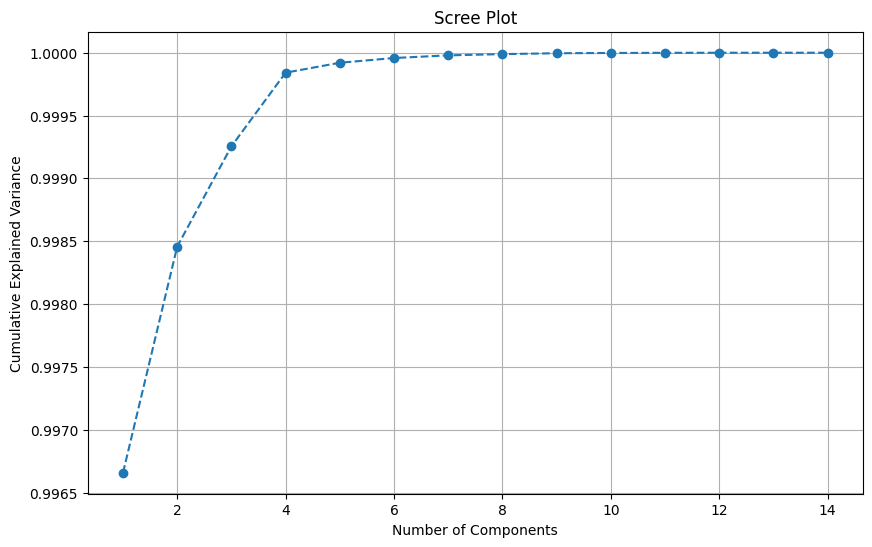

array([0.99665745, 0.99845688, 0.99925481, 0.99984125, 0.99992019,
       0.99995785, 0.999979  , 0.99998877, 0.99999587, 0.9999981 ,
       0.99999934, 0.99999988, 1.        , 1.        ])

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_data)

# Calculate the cumulative variance explained by the principal components
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the scree plot to visualize the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

cumulative_variance


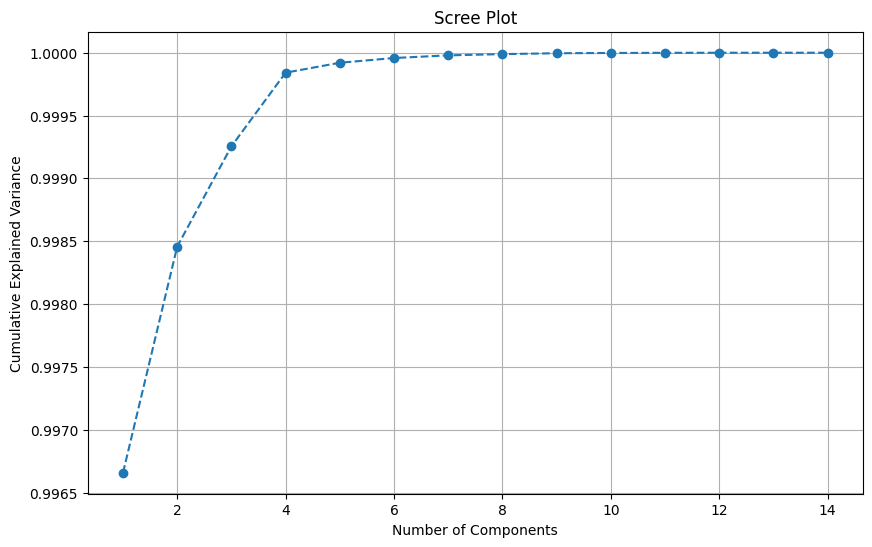

array([0.99665745, 0.99845688, 0.99925481, 0.99984125, 0.99992019,
       0.99995785, 0.999979  , 0.99998877, 0.99999587, 0.9999981 ,
       0.99999934, 0.99999988, 1.        , 1.        ])

In [5]:
import numpy as np

# Convert scaled data to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Fill NaN values with the median of each column
scaled_df_filled = scaled_df.fillna(scaled_df.median())

# Now, let's try PCA again with the NaN-handled data
pca = PCA()
pca.fit(scaled_df_filled)

# Calculating cumulative variance explained by the principal components
cumulative_variance_filled = pca.explained_variance_ratio_.cumsum()

# Plotting the scree plot to visualize the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_filled) + 1), cumulative_variance_filled, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

cumulative_variance_filled


In [6]:
from sklearn.preprocessing import RobustScaler

# Columns to be scaled (excluding categorical and identifier columns)
scale_columns = data.columns[1:-1]  # Ignore 'Network' and 'Type of Network' columns

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the data
data_scaled = data.copy()
data_scaled[scale_columns] = scaler.fit_transform(data[scale_columns])

# Display the scaled data
data_scaled.head()


Network     Nodes     Edges   Density  Maximum degree  \
0  CA-CondMat.txt  2.002239  1.512219 -0.318641       -0.343149   
1    CA-HepPh.txt  0.546612  2.021679  0.281028       -0.010208   
2  CA-AstroPh.txt  1.527737  3.655618  0.040345        0.010208   
3    CA-HepTh.txt  0.275705  0.656490 -0.233883       -0.577150   
4        rt-obama -0.577964 -0.333593 -0.172650       -0.361995   

   Minimum degree  Average degree  Assortativity  Number of triangles  \
0             0.0        0.042553       0.541398             0.847748   
1            -1.0        0.978723       1.802101            18.599917   
2            -1.0        1.148936       0.721462             7.342319   
3             0.0        0.256856       0.880513            -0.001539   
4             0.0       -0.468085      -0.498196            -0.050404   

   Average number of triangles  Maximum number of triangles  \
0                     0.153940                     0.088163   
1                    11.909336                     7.758915   
2                     2.930918                     2.001110   
3                    -0.038832                    -0.270742   
4                    -0.162607                    -0.371009   

   Average clustering coefficient  Fraction of closed triangles  \
0                        0.859231                      0.540816   
1                        0.822819                      1.946111   
2                        0.854548                      0.731734   
3                        0.589823                      0.610803   
4                       -0.186321                     -0.398071   

   Maximum k-core  Lower bound of Maximum Clique Type of Network  
0        0.038835                       0.712329   Collaboration  
1        4.174757                      12.547945   Collaboration  
2        0.640777                       0.986301   Collaboration  
3        1.689320                       1.205479   Collaboration  
4       -0.388350                      -0.383562         Retweet

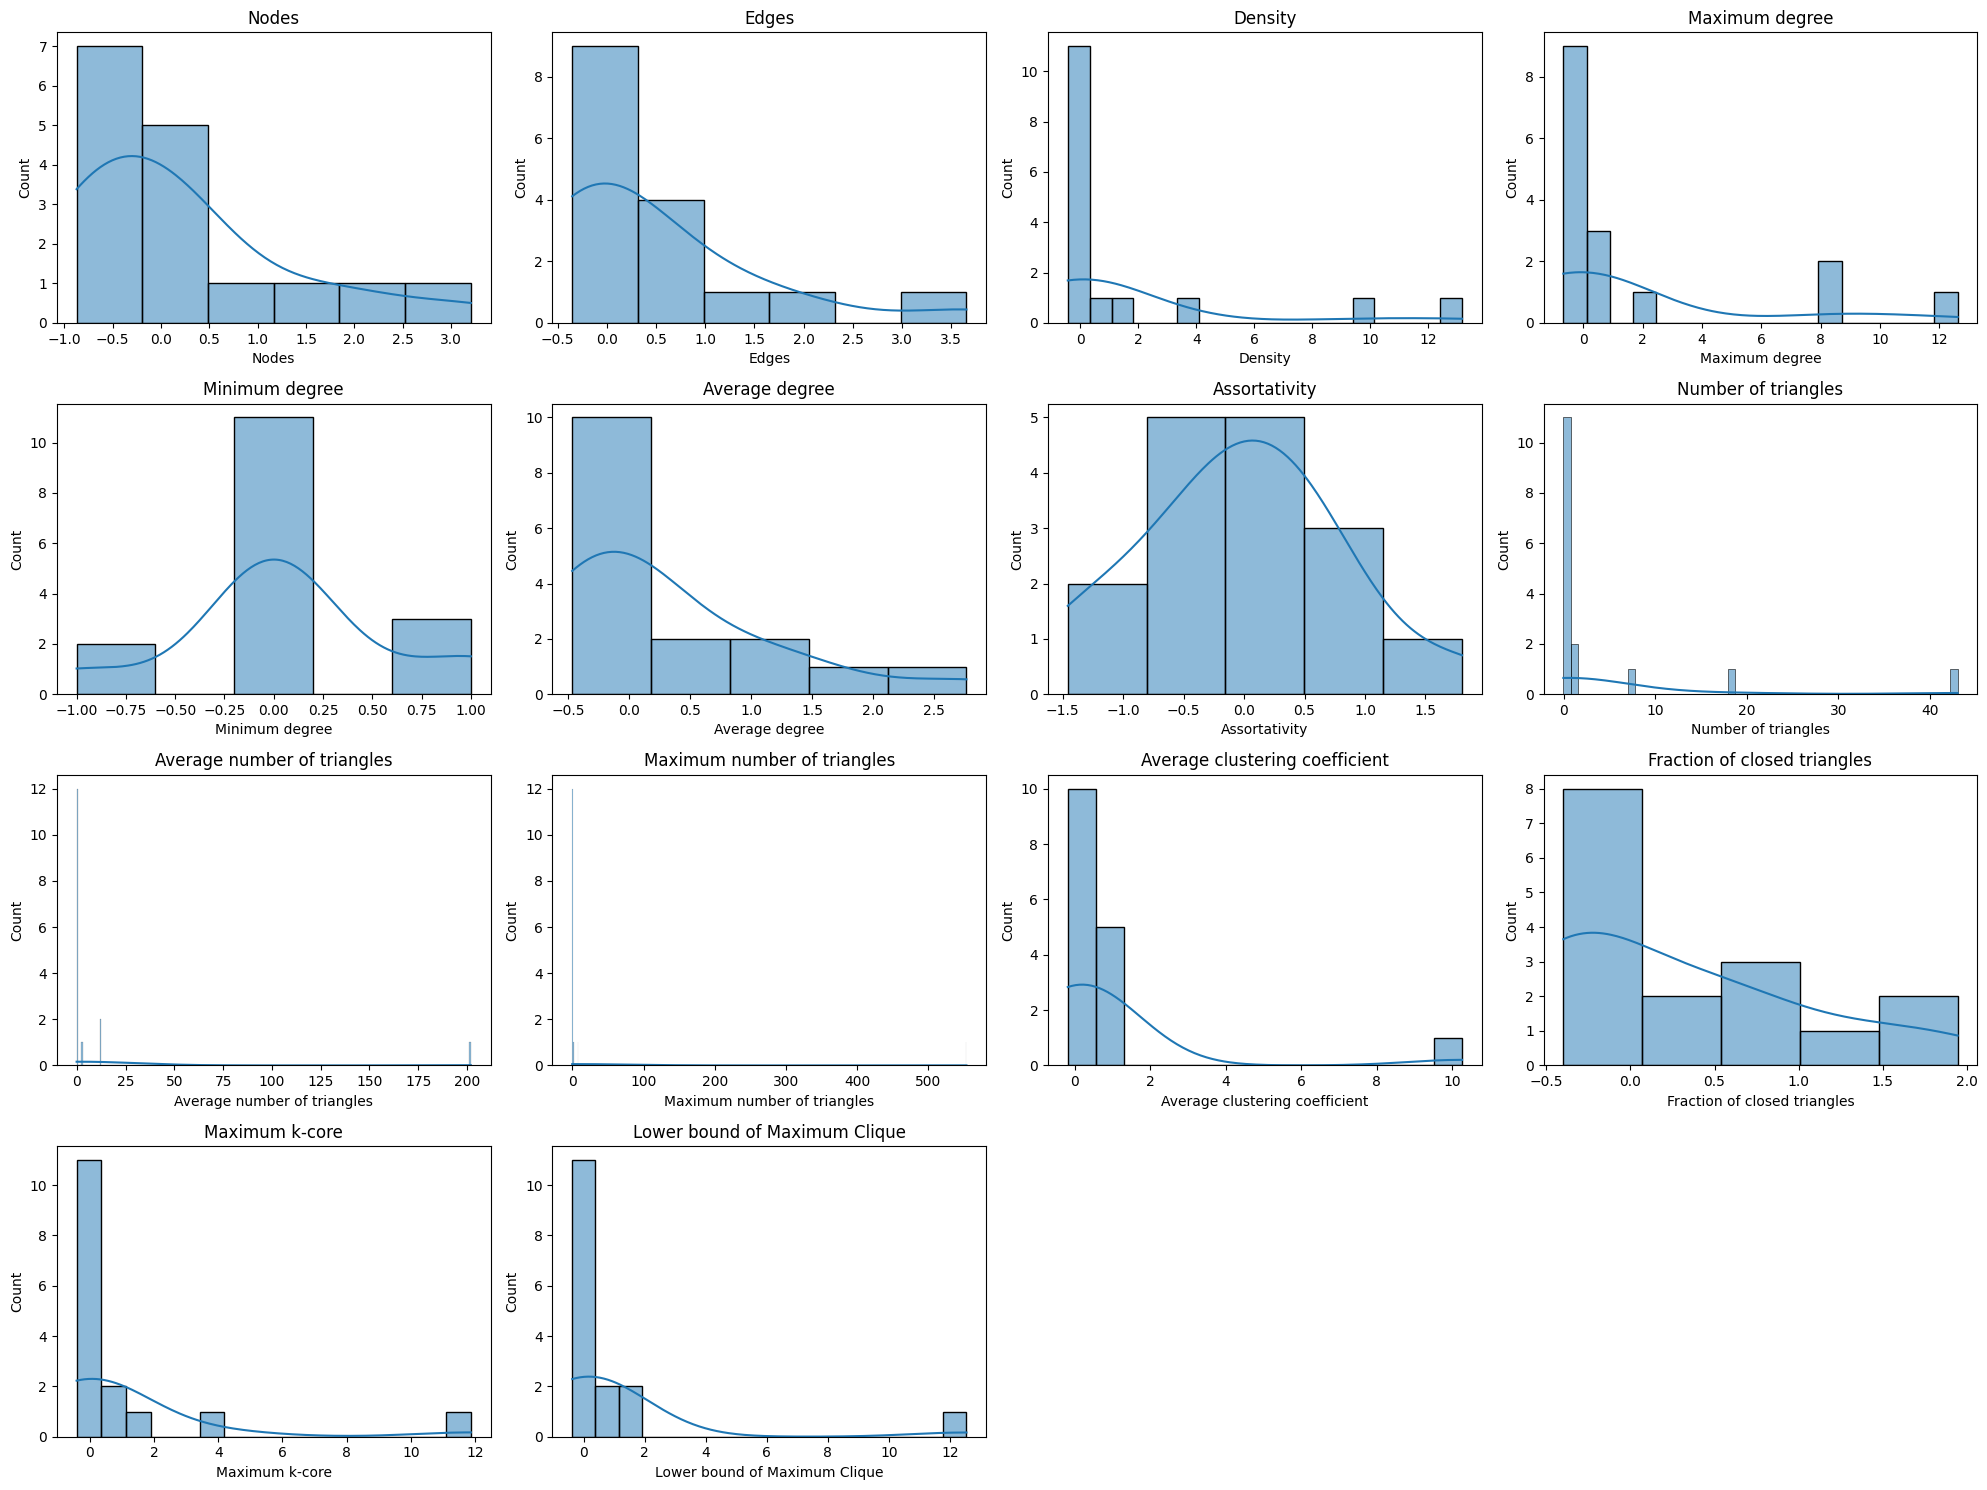

Nodes      Edges    Density  Maximum degree  Minimum degree  \
count  16.000000  16.000000  16.000000       16.000000        16.00000   
mean    0.205403   0.500236   1.661136        1.820671         0.06250   
std     1.147162   1.099684   3.952295        4.156886         0.57373   
min    -0.873056  -0.353151  -0.432507       -0.669808        -1.00000   
25%    -0.656568  -0.243177  -0.255073       -0.392226         0.00000   
50%     0.000000   0.000000   0.000000        0.000000         0.00000   
75%     0.343432   0.756823   0.744927        0.607774         0.00000   
max     3.204364   3.655618  13.176192       12.617982         1.00000   

       Average degree  Assortativity  Number of triangles  \
count       16.000000      16.000000            16.000000   
mean         0.305947      -0.031173             4.461283   
std          0.903916       0.844651            11.362650   
min         -0.468085      -1.457215            -0.050459   
25%         -0.404255      -0.564391            -0.038866   
50%          0.000000       0.000000             0.000000   
75%          0.595745       0.435609             0.961134   
max          2.765957       1.802101            43.042645   

       Average number of triangles  Maximum number of triangles  \
count                 1.600000e+01                    16.000000   
mean                  1.428218e+01                    35.227342   
std                   5.022958e+01                   138.188442   
min                  -1.626068e-01                    -0.371816   
25%                  -1.518154e-01                    -0.337368   
50%                  -1.387779e-17                     0.000000   
75%                   8.481846e-01                     0.662632   
max                   2.020101e+02                   553.375902   

       Average clustering coefficient  Fraction of closed triangles  \
count                       16.000000                     16.000000   
mean                         0.830361                      0.281274   
std                          2.550216                      0.774591   
min                         -0.190193                     -0.399157   
25%                         -0.176162                     -0.358964   
50%                          0.000000                      0.000000   
75%                          0.823838                      0.641036   
max                         10.256158                      1.946111   

       Maximum k-core  Lower bound of Maximum Clique  
count       16.000000                      16.000000  
mean         1.082524                       0.969178  
std          3.102833                       3.146225  
min         -0.407767                      -0.383562  
25%         -0.271845                      -0.219178  
50%          0.000000                       0.000000  
75%          0.728155                       0.780822  
max         11.864078                      12.547945

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate summary statistics for the scaled data
data_scaled_description = data_scaled[scale_columns].describe()

# Set up the visualization
plt.figure(figsize=(20, 15))

# Number of rows and columns for subplots
n_rows, n_cols = 4, 4

# Plot histograms for each scaled column
for index, column in enumerate(scale_columns):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.histplot(data_scaled[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

data_scaled_description


Summary of Scaled Data
The summary statistics and histograms for each variable provide insights into the distribution of your scaled dataset:

Descriptive Statistics

Central Tendencies and Spread: The mean values are close to zero for most features, thanks to the Robust Scaler. Standard deviations vary, indicating differing levels of dispersion among features.

Range and IQR (Interquartile Range): The data ranges from negative values (representing values below the median) to positive values (above the median), with the interquartile range providing a sense of the middle 50% of the data.

Histogram Observations
Density and Clustering Coefficients: These features display skewed distributions, suggesting that a few networks have significantly higher values compared to others.

Degree Metrics (e.g., Maximum, Average): These metrics also show a range of distributions, some more uniform and others skewed, which could influence clustering outcomes.

Triangles Metrics: Number of triangles, both average and maximum, are heavily right-skewed, indicating most networks have fewer triangles, but a few have a much higher count.

Visualizations


The histograms provide a visual representation of each feature's distribution post-scaling:

Most features are not normally distributed, which is typical in network data due to the diverse nature and size of networks.
Features like "Density" and "Maximum number of triangles" show extreme values, highlighting networks that are either very dense or have a high number of triangles.

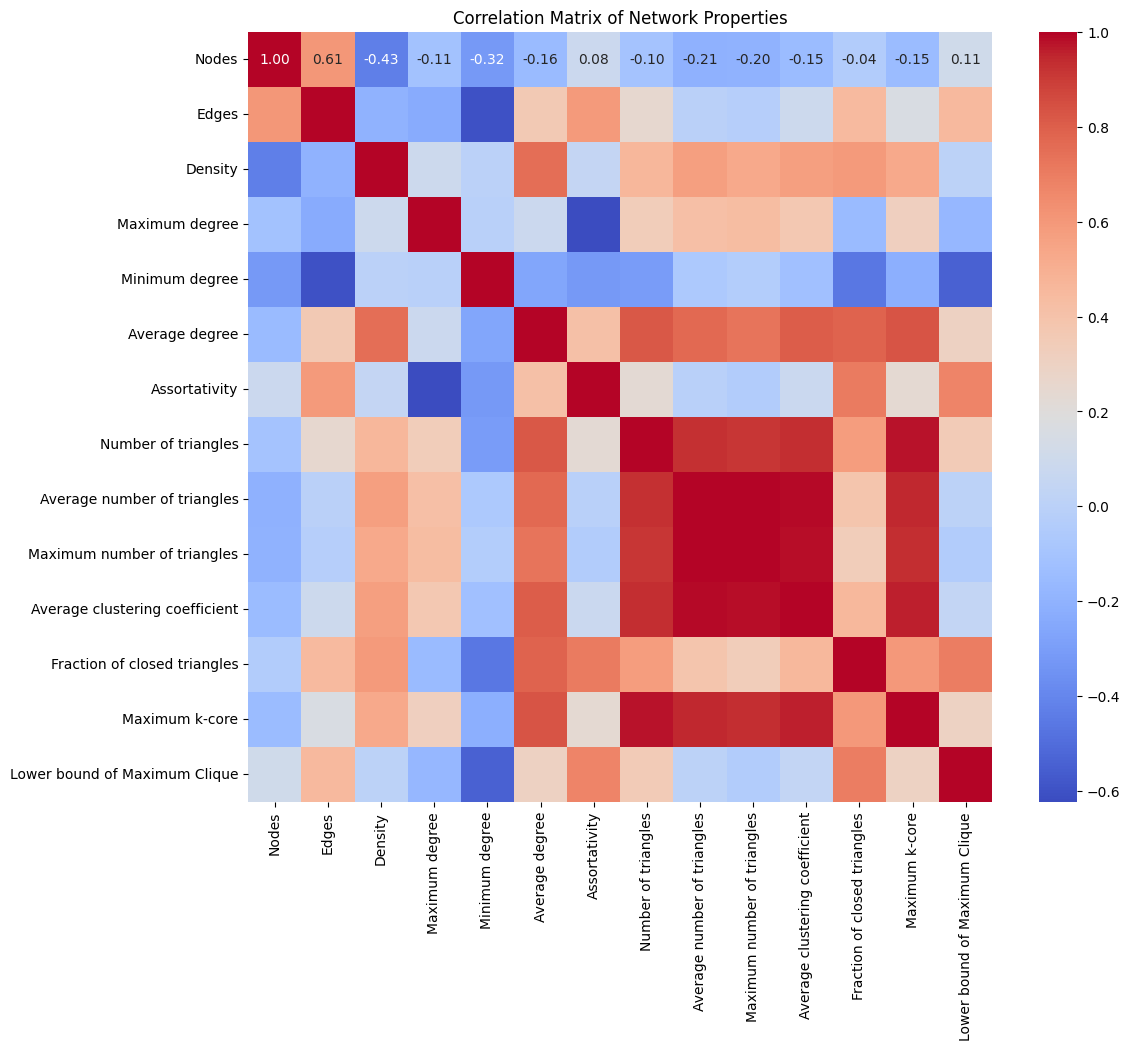

In [8]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = data_scaled[scale_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Network Properties")
plt.show()


Correlation Analysis

The heatmap visualizes the correlations between different network properties:

High Positive Correlation: Some features, like the number of nodes and edges, show a high positive correlation, which is expected as more nodes generally imply more edges.

Negative Correlations: There are a few negatively correlated pairs, like assortativity with some degree metrics, indicating that as assortativity increases, those degree metrics decrease or vice versa. This could suggest structural differences in network types where high assortativity might imply a more structured or hierarchical network.

Triangles and Clustering: Metrics related to triangles (e.g., number of triangles, maximum number of triangles) tend to have positive correlations with clustering coefficients, suggesting that networks with many triangles also tend to have higher clustering.

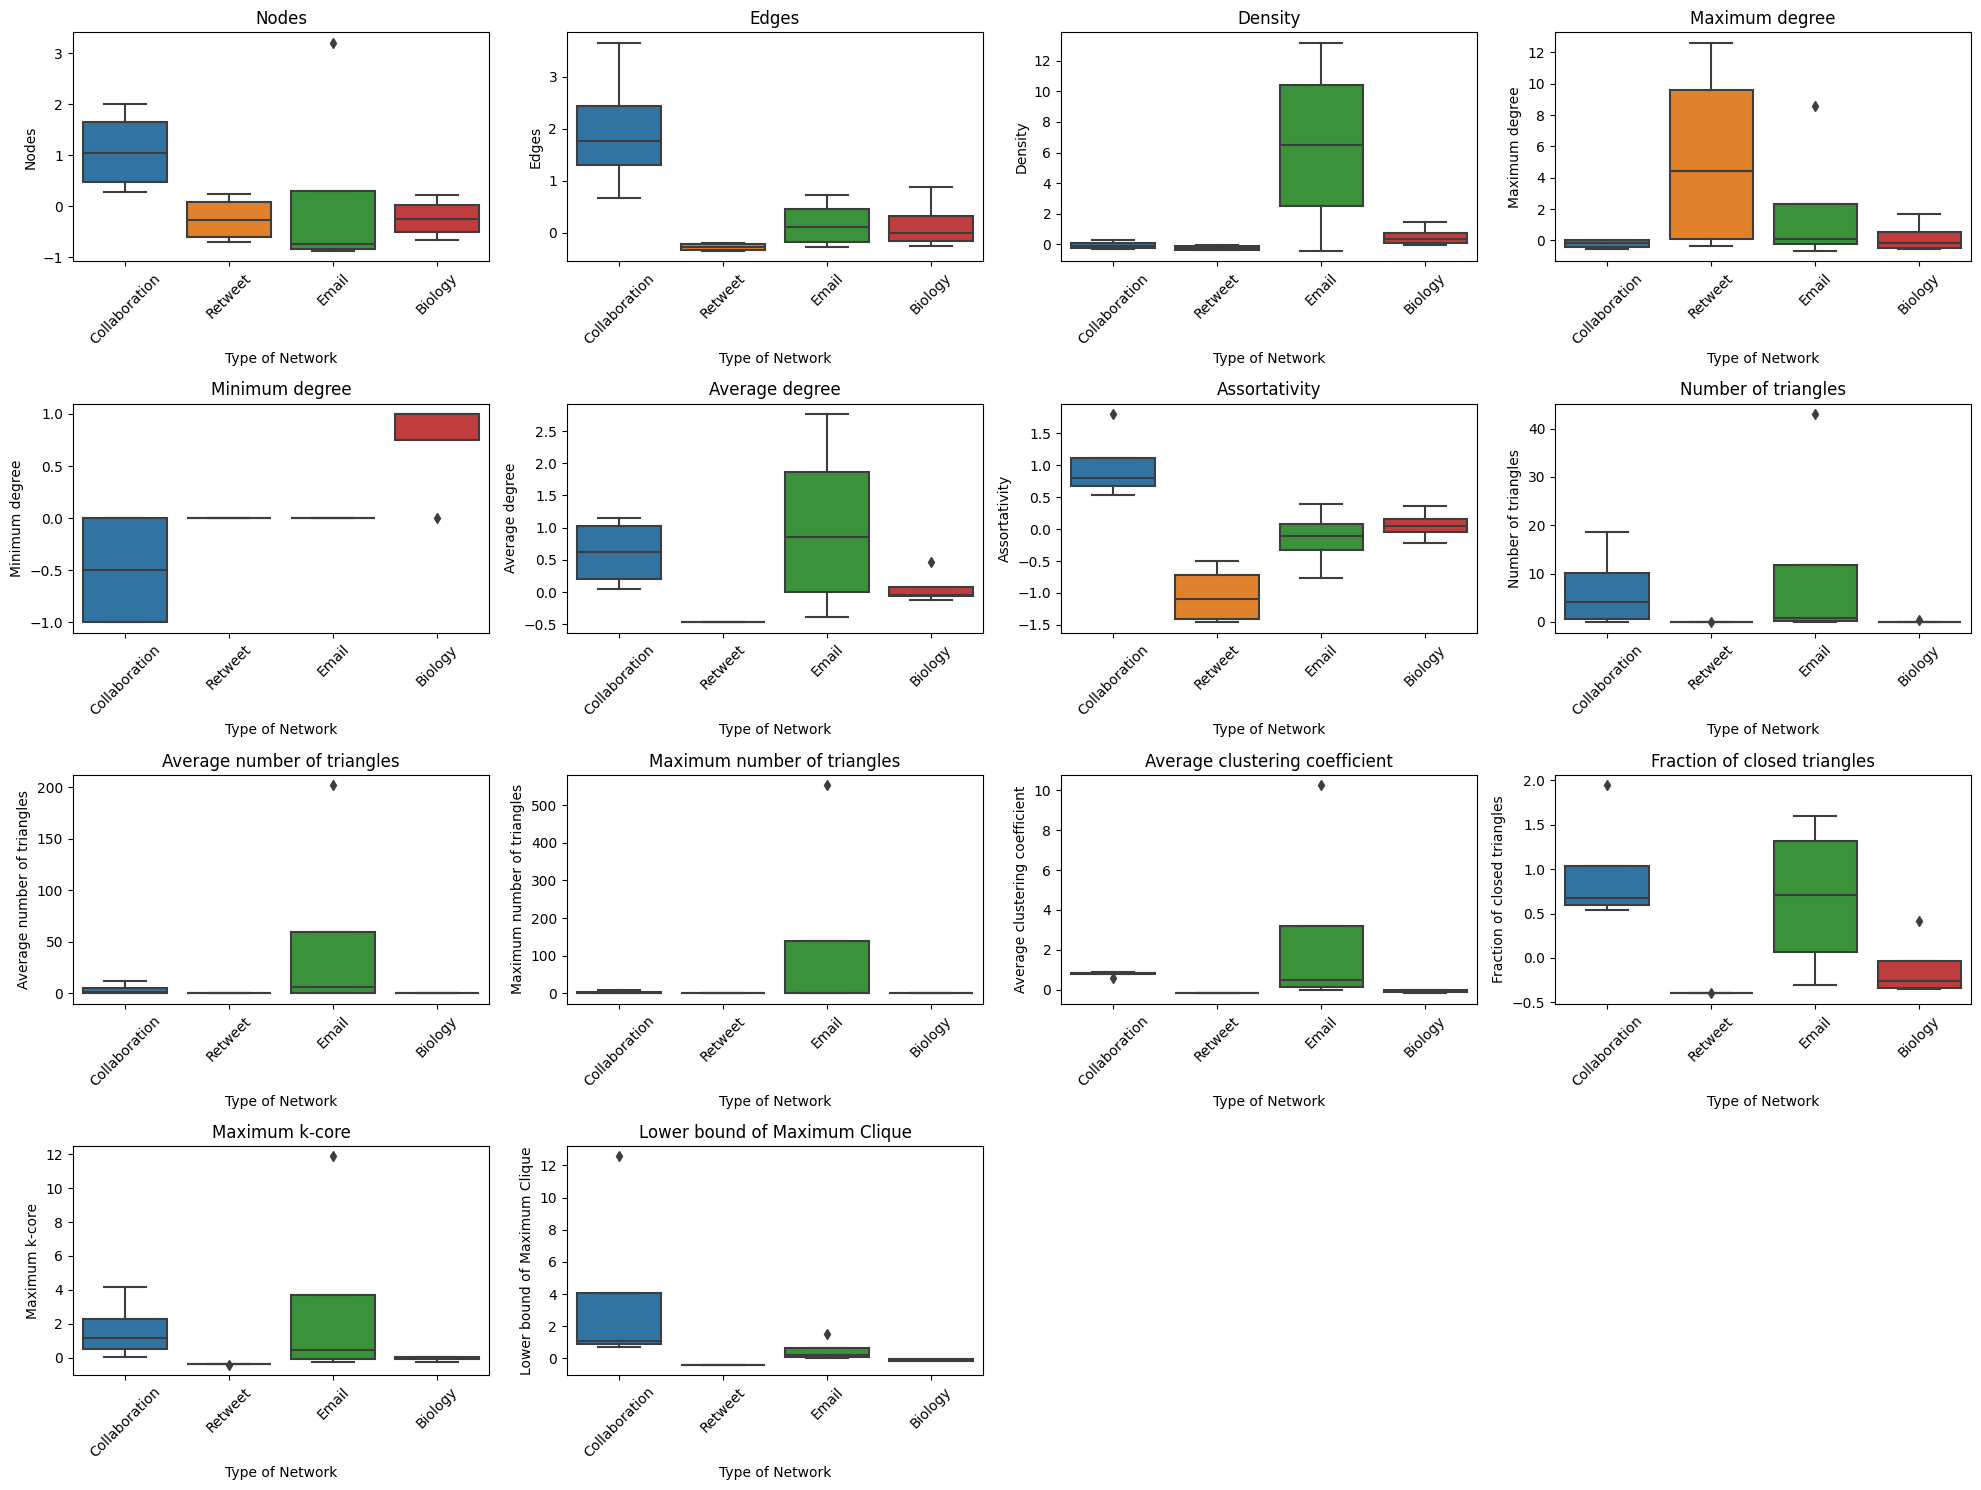

In [9]:
# Set up visualization for comparing features across different types of networks
plt.figure(figsize=(20, 15))

# Plot boxplots for each scaled column by network type
for index, column in enumerate(scale_columns):
    plt.subplot(4, 4, index + 1)
    sns.boxplot(x='Type of Network', y=column, data=data_scaled)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Feature Comparison by Network Type

The box plots above display how different properties of networks vary across various types of networks in your dataset. Here are some key observations:

Density Variations:
Certain network types (e.g., social networks) may show higher density values, suggesting more connections relative to the number of nodes, compared to others like citation networks.

Degree Metrics:
There are significant differences in degree-related metrics (maximum, average) across network types. For instance, collaboration networks might have higher average degrees, indicating a common trend of multiple collaborations among nodes.

Clustering Coefficients:
This metric, which indicates the likelihood that two connected nodes are also connected to a third node, varies widely. Social networks might have higher clustering coefficients, reflecting a tighter-knit community structure.

Triangles and K-core:
The presence of triangles and the structure of the k-core also show variations, which can be indicative of how robust or interconnected the network is. Networks with high k-core values are typically more resilient to node removal.

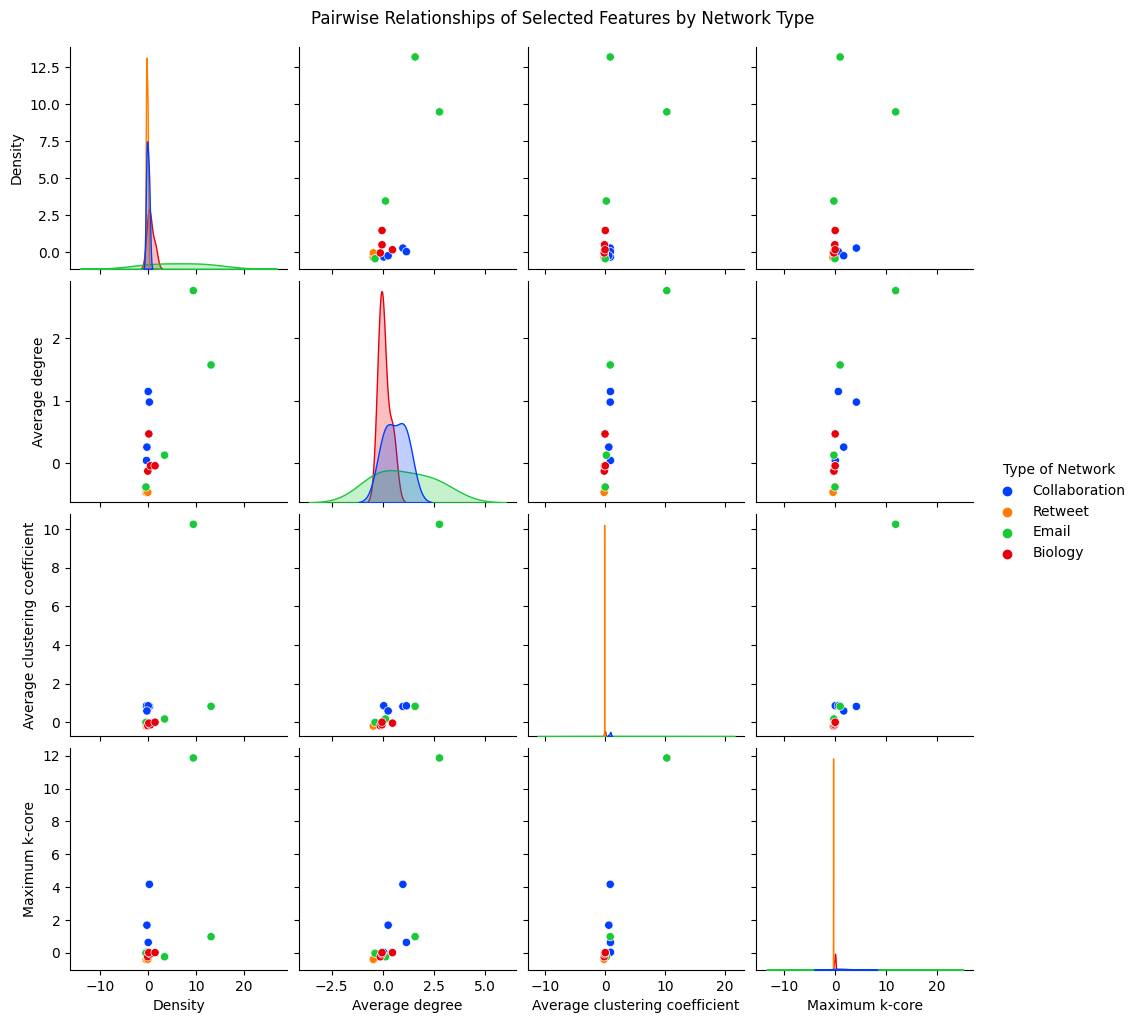

In [10]:
# Selecting a subset of features for the pair plot to avoid over-cluttering
selected_features = ['Density', 'Average degree', 'Average clustering coefficient', 'Maximum k-core']

# Creating a pair plot for these selected features, colored by network type
sns.pairplot(data_scaled, vars=selected_features, hue='Type of Network', kind='scatter', markers='o', palette='bright')
plt.suptitle("Pairwise Relationships of Selected Features by Network Type", y=1.02)  # Adjust title placement
plt.show()


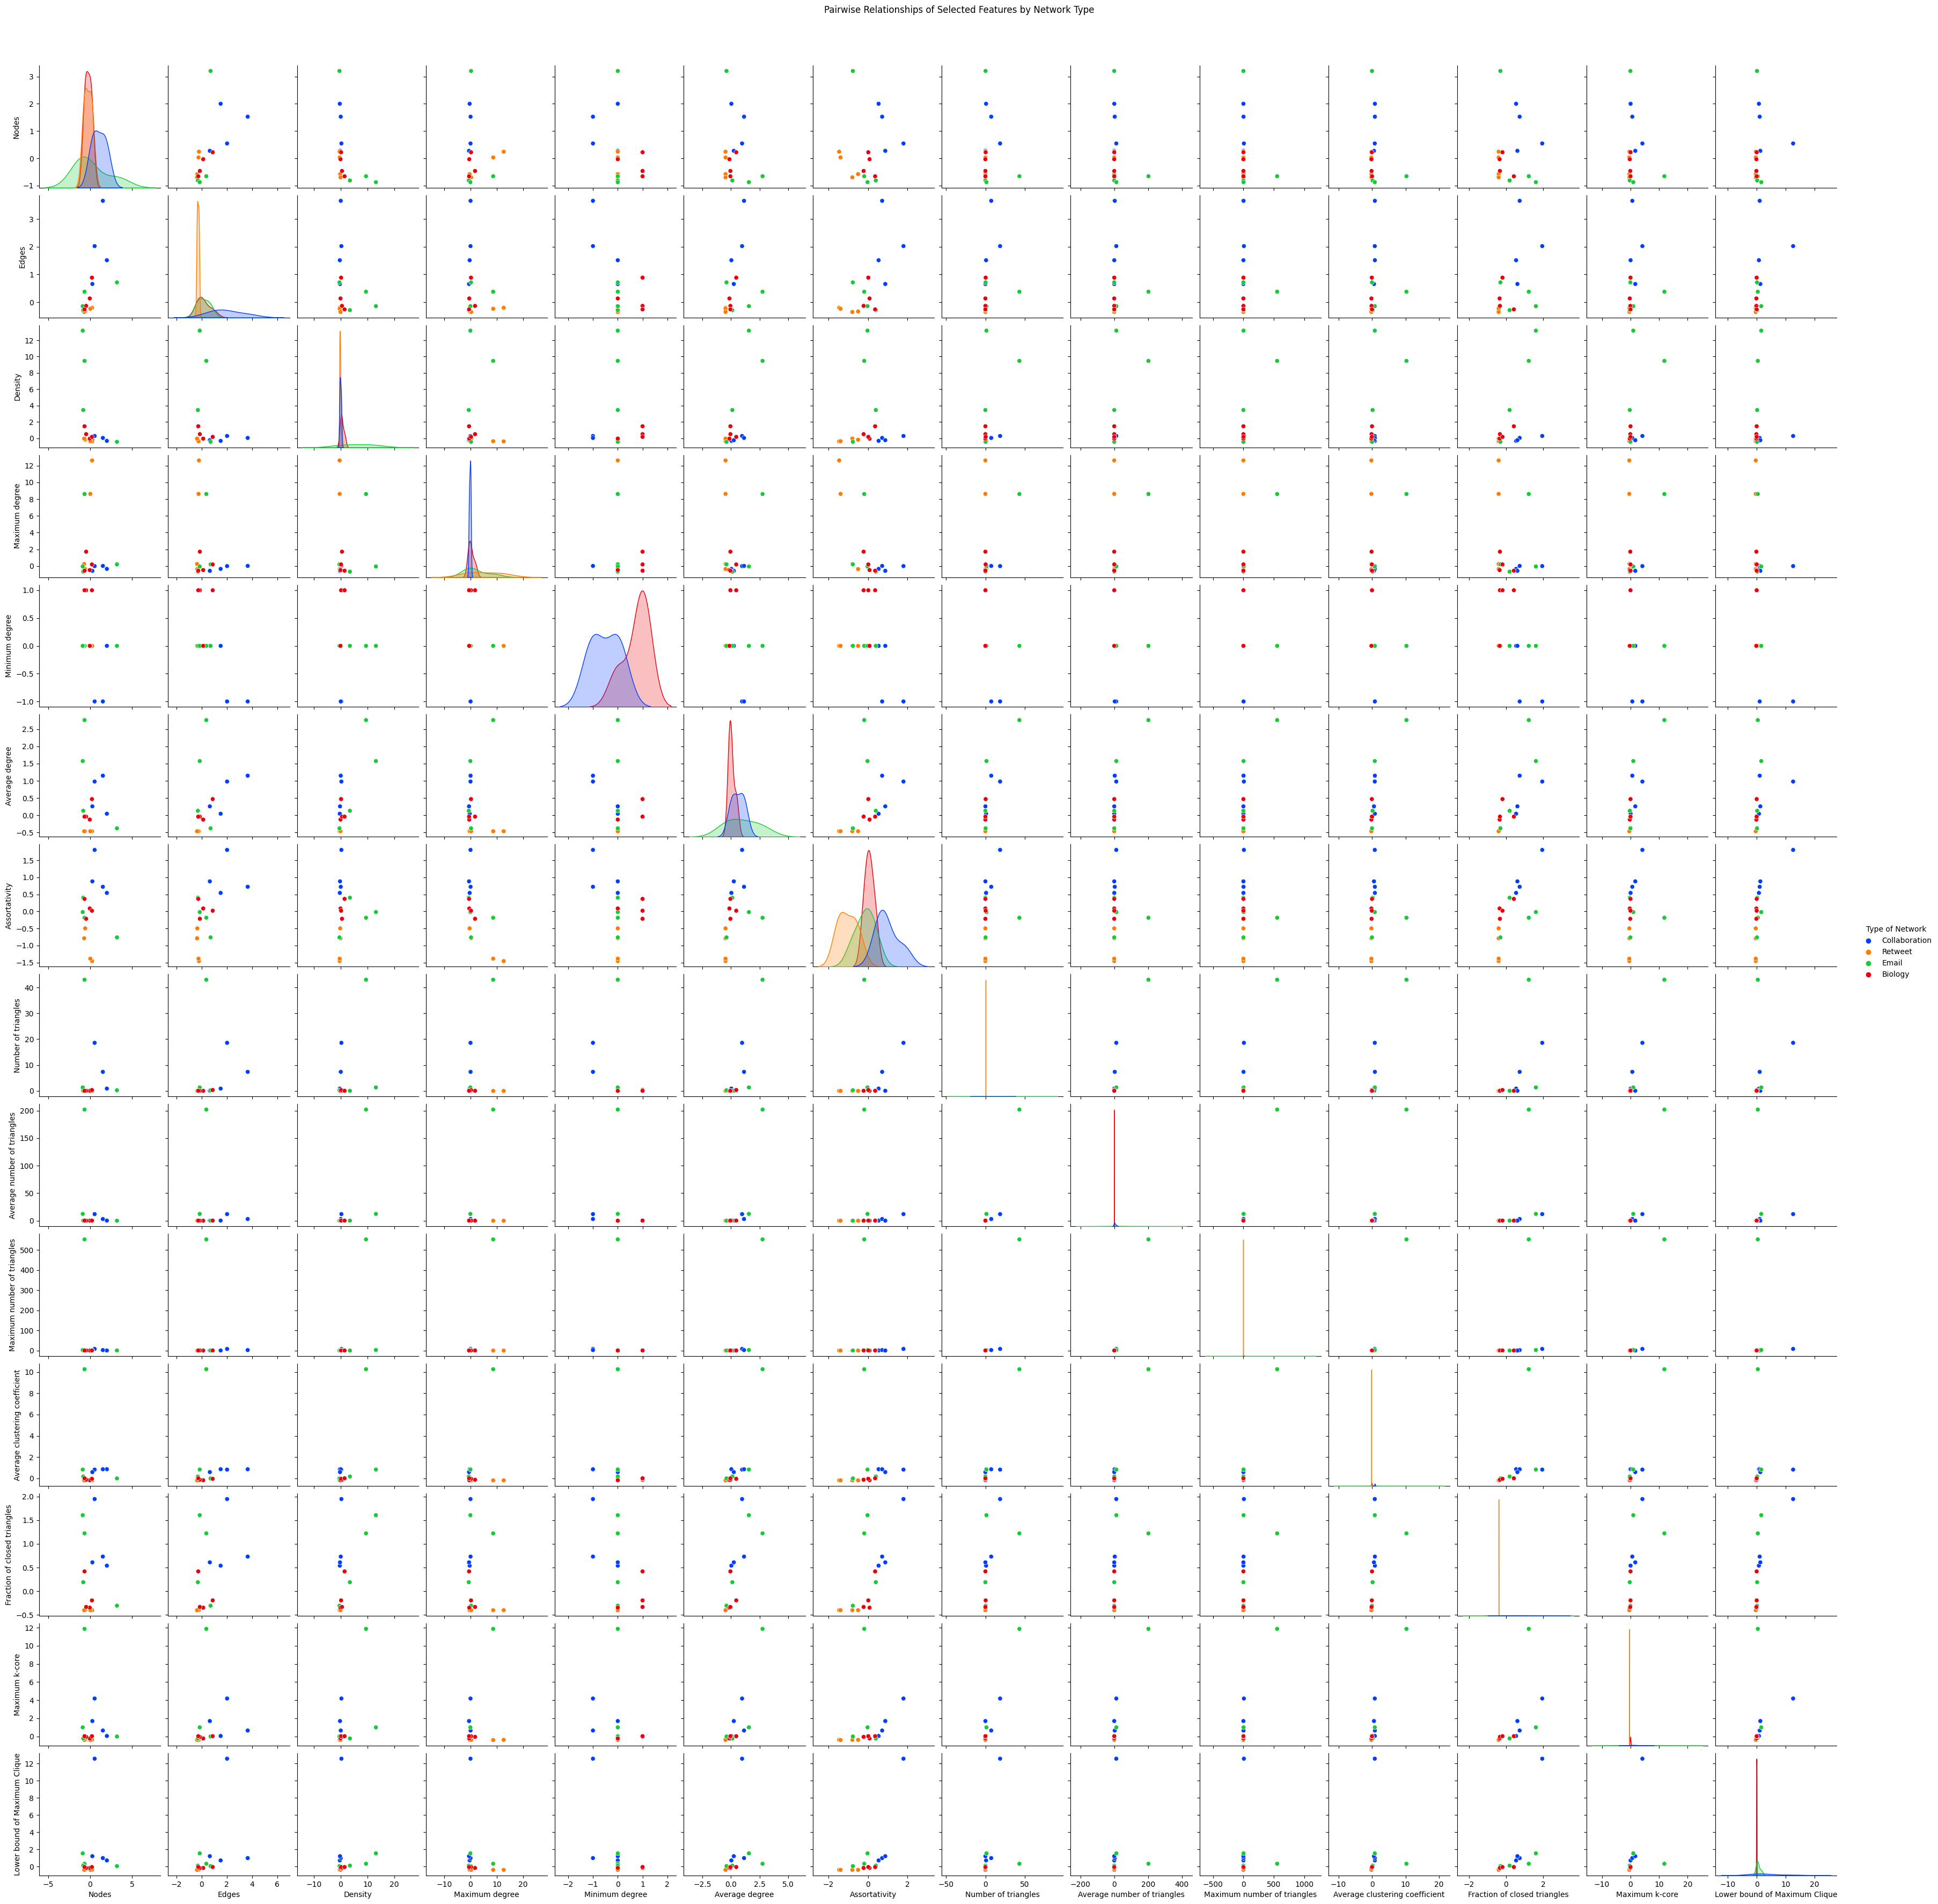

In [11]:
# Selecting a subset of features for the pair plot to avoid over-cluttering
selected_features = ['Density', 'Average degree', 'Average clustering coefficient', 'Maximum k-core']

# Creating a pair plot for these selected features, colored by network type
sns.pairplot(data_scaled, hue='Type of Network', kind='scatter', markers='o', palette='bright')
plt.suptitle("Pairwise Relationships of Selected Features by Network Type", y=1.02)  # Adjust title placement
plt.show()


Pairwise Relationships and Distributions

The scatter plots above explore the relationships between selected features (Density, Average degree, Average clustering coefficient, Maximum k-core), colored by network type. Additionally, histograms on the diagonal provide a distribution overview for each feature within the context of network types.

Observations from Scatter Plots:
Density vs. Average Degree: Shows varying patterns for different network types, which might indicate that denser networks (e.g., social networks) also tend to have higher average degrees.

Density vs. Clustering Coefficient: There seems to be a positive correlation for some network types, suggesting that networks with more connections per node also have higher probabilities of their neighbors being connected.

K-core vs. Other Metrics: The maximum k-core also varies significantly with the density and clustering, which is expected as k-core measures the robustness of a network to node removals.

Observations from Histograms:
Each feature's distribution varies by network type, which could be crucial in understanding how different types of networks cluster based on these structural properties.

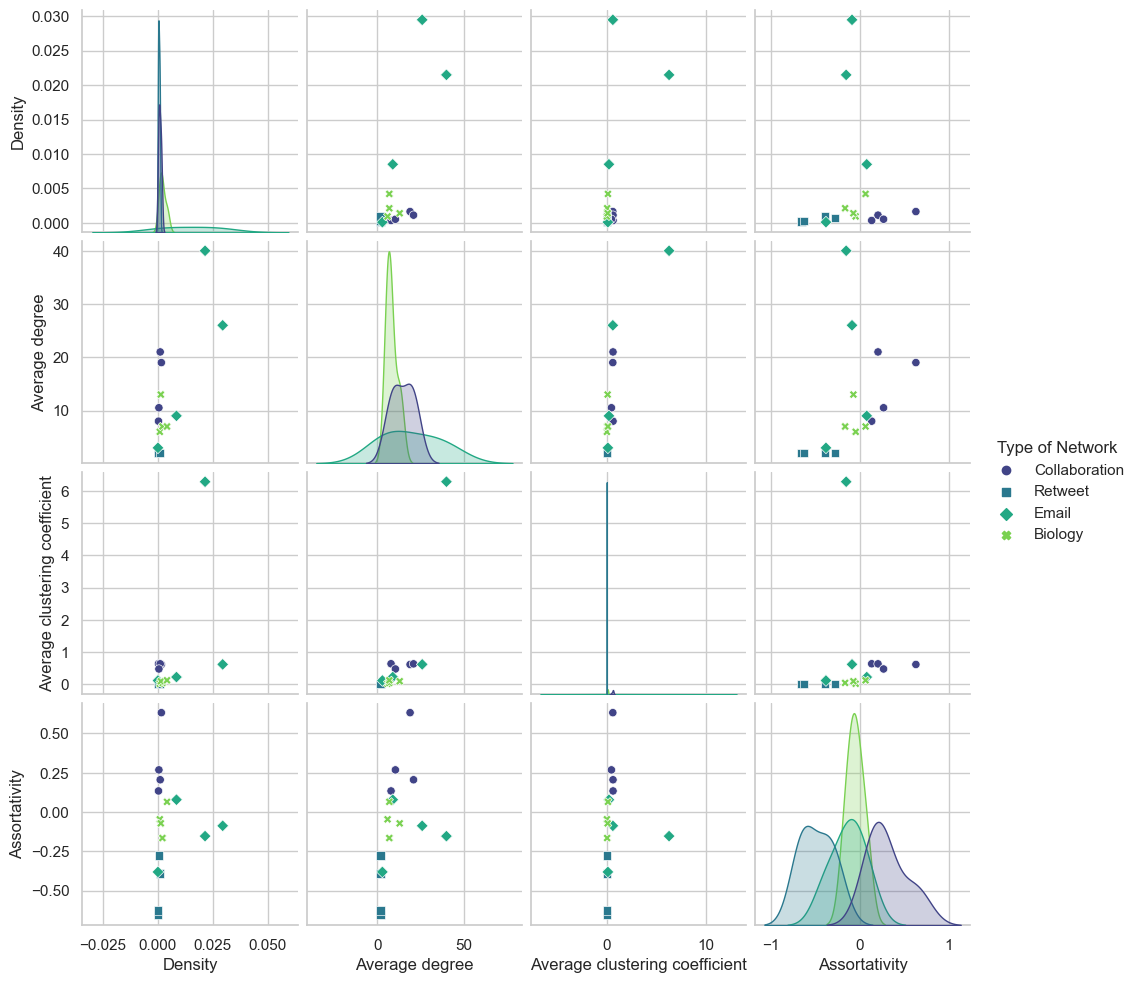

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visualization
sns.set(style="whitegrid")

# Create a pairplot to visualize relationships between some of the key properties
# across different types of networks
key_properties = ['Density', 'Average degree', 'Average clustering coefficient', 'Assortativity', 'Type of Network']
pairplot_data = data[key_properties]
pairplot = sns.pairplot(pairplot_data, hue="Type of Network", palette="viridis", markers=["o", "s", "D", "X"])

plt.show()


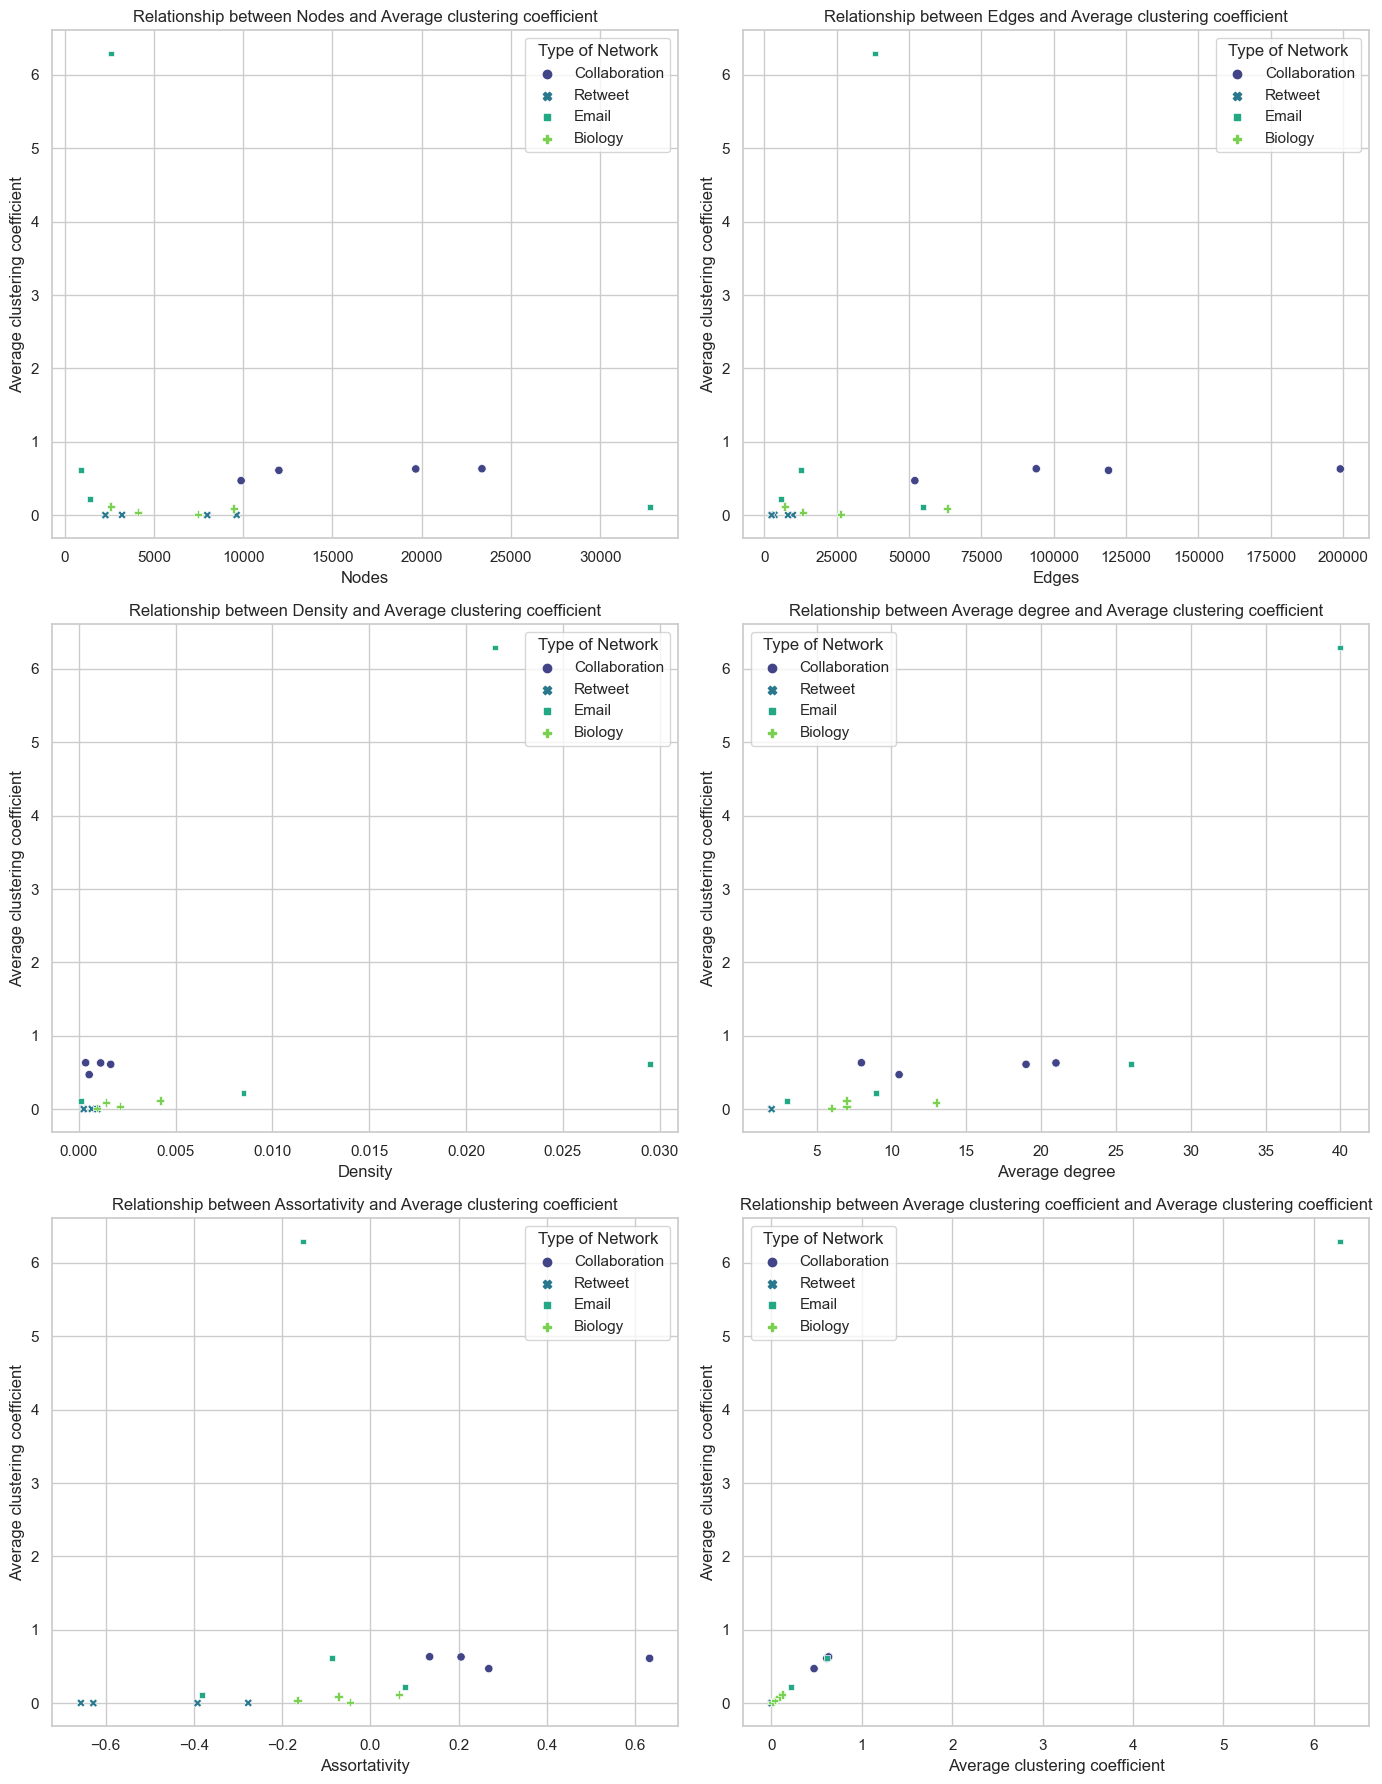

In [13]:
# Create a focused visualization for numeric graph properties and color by network type
# We'll use scatter plots for pairwise relationships and color by 'Type of Network'

# Selecting key numeric properties for visualization
numeric_properties = ['Nodes', 'Edges', 'Density', 'Average degree', 'Assortativity', 
                      'Average clustering coefficient']

# Create scatter plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_properties):
    sns.scatterplot(data=data, x=col, y='Average clustering coefficient', hue='Type of Network', 
                    style='Type of Network', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Relationship between {col} and Average clustering coefficient')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average clustering coefficient')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.decomposition import PCA

# Applying PCA to the scaled data (excluding categorical columns and network identifier)
pca = PCA()
pca_features = data_scaled[scale_columns]
pca_result = pca.fit_transform(pca_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Prepare the data for loading analysis
loadings = pca.components_
features_pca_loadings = pd.DataFrame(loadings, columns=scale_columns)

# Displaying the results
explained_variance_ratio, cumulative_variance_ratio, features_pca_loadings.head()


(array([9.96657450e-01, 1.79942795e-03, 7.97933214e-04, 5.86439416e-04,
        7.89400122e-05, 3.76611033e-05, 2.11485523e-05, 9.77454261e-06,
        7.09507872e-06, 2.22634666e-06, 1.24748768e-06, 5.39134119e-07,
        1.16151686e-07, 1.18384118e-09]),
 array([0.99665745, 0.99845688, 0.99925481, 0.99984125, 0.99992019,
        0.99995785, 0.999979  , 0.99998877, 0.99999587, 0.9999981 ,
        0.99999934, 0.99999988, 1.        , 1.        ]),
       Nodes     Edges   Density  Maximum degree  Minimum degree  \
 0 -0.001553 -0.000140  0.014334        0.012160       -0.000166   
 1  0.018092  0.099218  0.114411       -0.188752       -0.055618   
 2 -0.103232 -0.080094  0.733081       -0.387095        0.031206   
 3 -0.065443 -0.082053  0.306552        0.886119       -0.016342   
 4  0.608836  0.566320  0.076648        0.050149       -0.160654   
 
    Average degree  Assortativity  Number of triangles  \
 0        0.004524      -0.000198             0.070467   
 1        0.068039    

PCA Analysis Results

Variance Explained

Individual Component Variance: The first principal component (PC) captures approximately 99.67% of the variance, which is significantly dominant. The second PC adds about 0.18%, and subsequent PCs contribute even smaller amounts.

Cumulative Variance: The cumulative variance quickly approaches near-totality with just the first few components, indicating that most of the data variability can be represented by the initial PCs.

PCA Loadings
First Principal Component: This component heavily weights the Maximum number of triangles and Average number of triangles, indicating that the variability in these features dominates the dataset. This suggests that the primary differentiator between networks in your dataset may relate to their triadic closure properties.

Subsequent Components: The second and third PCs begin to incorporate other features like Edges, Density, and Lower bound of Maximum Clique. These components might capture more nuanced differences between networks that aren't explained by triangle counts alone.

Interpretation
The dominant first principal component implies that your network dataset's variability is heavily influenced by triangle-related metrics. This could reflect the importance of closed triplets in network structure, which is typically significant in social network analysis. The minor components, though explaining less variance, are critical for capturing aspects not related to triangles, such as connectivity and node interaction intensity.

Recommendations for Dimensionality Reduction
Given the high percentage of variance explained by the first few components:

Modeling Simplicity: You might consider reducing the dimensionality to the first few principal components for further clustering or classification models to simplify the model without losing significant information.

Feature Importance: The loading vectors of the PCs can be used to understand which features contribute most to the variability in your dataset, potentially informing which network metrics are most informative for differentiating network types.

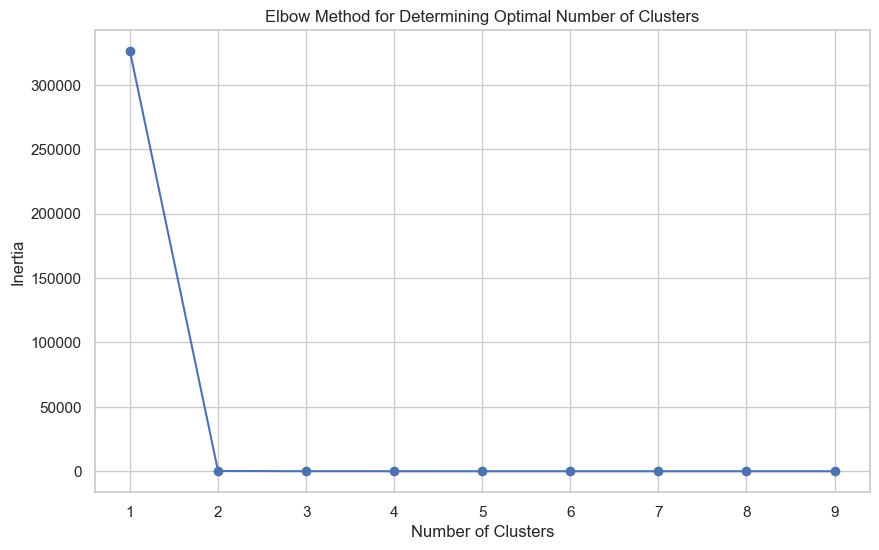

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Select the number of components to use based on the cumulative variance
# Assuming we use components that add up to at least 99% variance explained
n_components = np.where(cumulative_variance_ratio >= 0.99)[0][0] + 1
pca_reduced_data = pca_result[:, :n_components]

# Applying the Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 10)  # Testing 1 to 9 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_reduced_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Determining Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


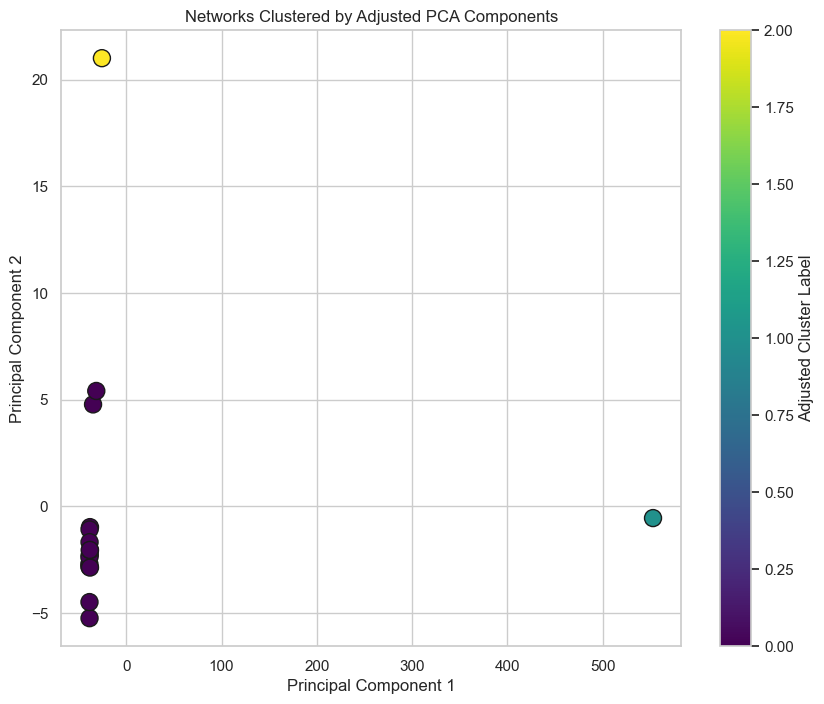

(                 Network     Nodes     Edges    Density  Maximum degree  \
 0         CA-CondMat.txt  2.002239  1.512219  -0.318641       -0.343149   
 1           CA-HepPh.txt  0.546612  2.021679   0.281028       -0.010208   
 2         CA-AstroPh.txt  1.527737  3.655618   0.040345        0.010208   
 3           CA-HepTh.txt  0.275705  0.656490  -0.233883       -0.577150   
 4               rt-obama -0.577964 -0.333593  -0.172650       -0.361995   
 5   rt_barackobama.edges  0.243458 -0.203093  -0.382299       12.617982   
 6        rt_onedirection  0.033080 -0.237620  -0.362333        8.621123   
 7    rt_voteonedirection -0.697230 -0.353151  -0.040345        0.239497   
 8               email-EU  3.204364  0.714205  -0.432507        0.197095   
 9              email-dnc -0.655896  0.376747   9.472080        8.605418   
 10                  univ -0.810608 -0.287381   3.457547       -0.669808   
 11      dnc-coreceipient -0.873056 -0.143175  13.176192       -0.055752   
 12         

In [16]:
# Adjusting the PCA to use the first two principal components for better visualization and clustering
# This allows us to view the data in a 2D space

# Redefining PCA with the first two components
pca_adjusted = PCA(n_components=2)
pca_adjusted_result = pca_adjusted.fit_transform(pca_features)

# Reapplying K-means clustering with the chosen number of clusters (3) on the adjusted PCA result
kmeans_adjusted = KMeans(n_clusters=3, random_state=42)
clusters_adjusted = kmeans_adjusted.fit_predict(pca_adjusted_result)

# Adding adjusted cluster labels to the original and scaled data for further analysis
data_scaled['Adjusted Cluster'] = clusters_adjusted
data['Adjusted Cluster'] = clusters_adjusted

# Visualizing the adjusted clusters in the new PCA reduced space (two principal components)
plt.figure(figsize=(10, 8))
plt.scatter(pca_adjusted_result[:, 0], pca_adjusted_result[:, 1], c=clusters_adjusted, cmap='viridis', marker='o', edgecolor='k', s=150)
plt.title("Networks Clustered by Adjusted PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Adjusted Cluster Label')
plt.grid(True)
plt.show()

# Return the first few rows of the updated data to verify clustering
data_scaled, data


In [17]:
# Performing K-means clustering with the chosen number of clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_reduced_data)

# Adding cluster labels to the original and scaled data for further analysis
data_scaled['Cluster'] = clusters
data['Cluster'] = clusters

# Visualizing the clusters in the PCA reduced space (first two principal components)
plt.figure(figsize=(10, 8))
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=150)
plt.title("Networks Clustered by PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Return the first few rows of the updated data to verify clustering
data_scaled.head(), data.head()


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x800 with 0 Axes>

C:\Users\hari1\AppData\Local\Temp\ipykernel_22424\3635528239.py:2: FutureWarning: ['Network', 'Type of Network'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_summary = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])


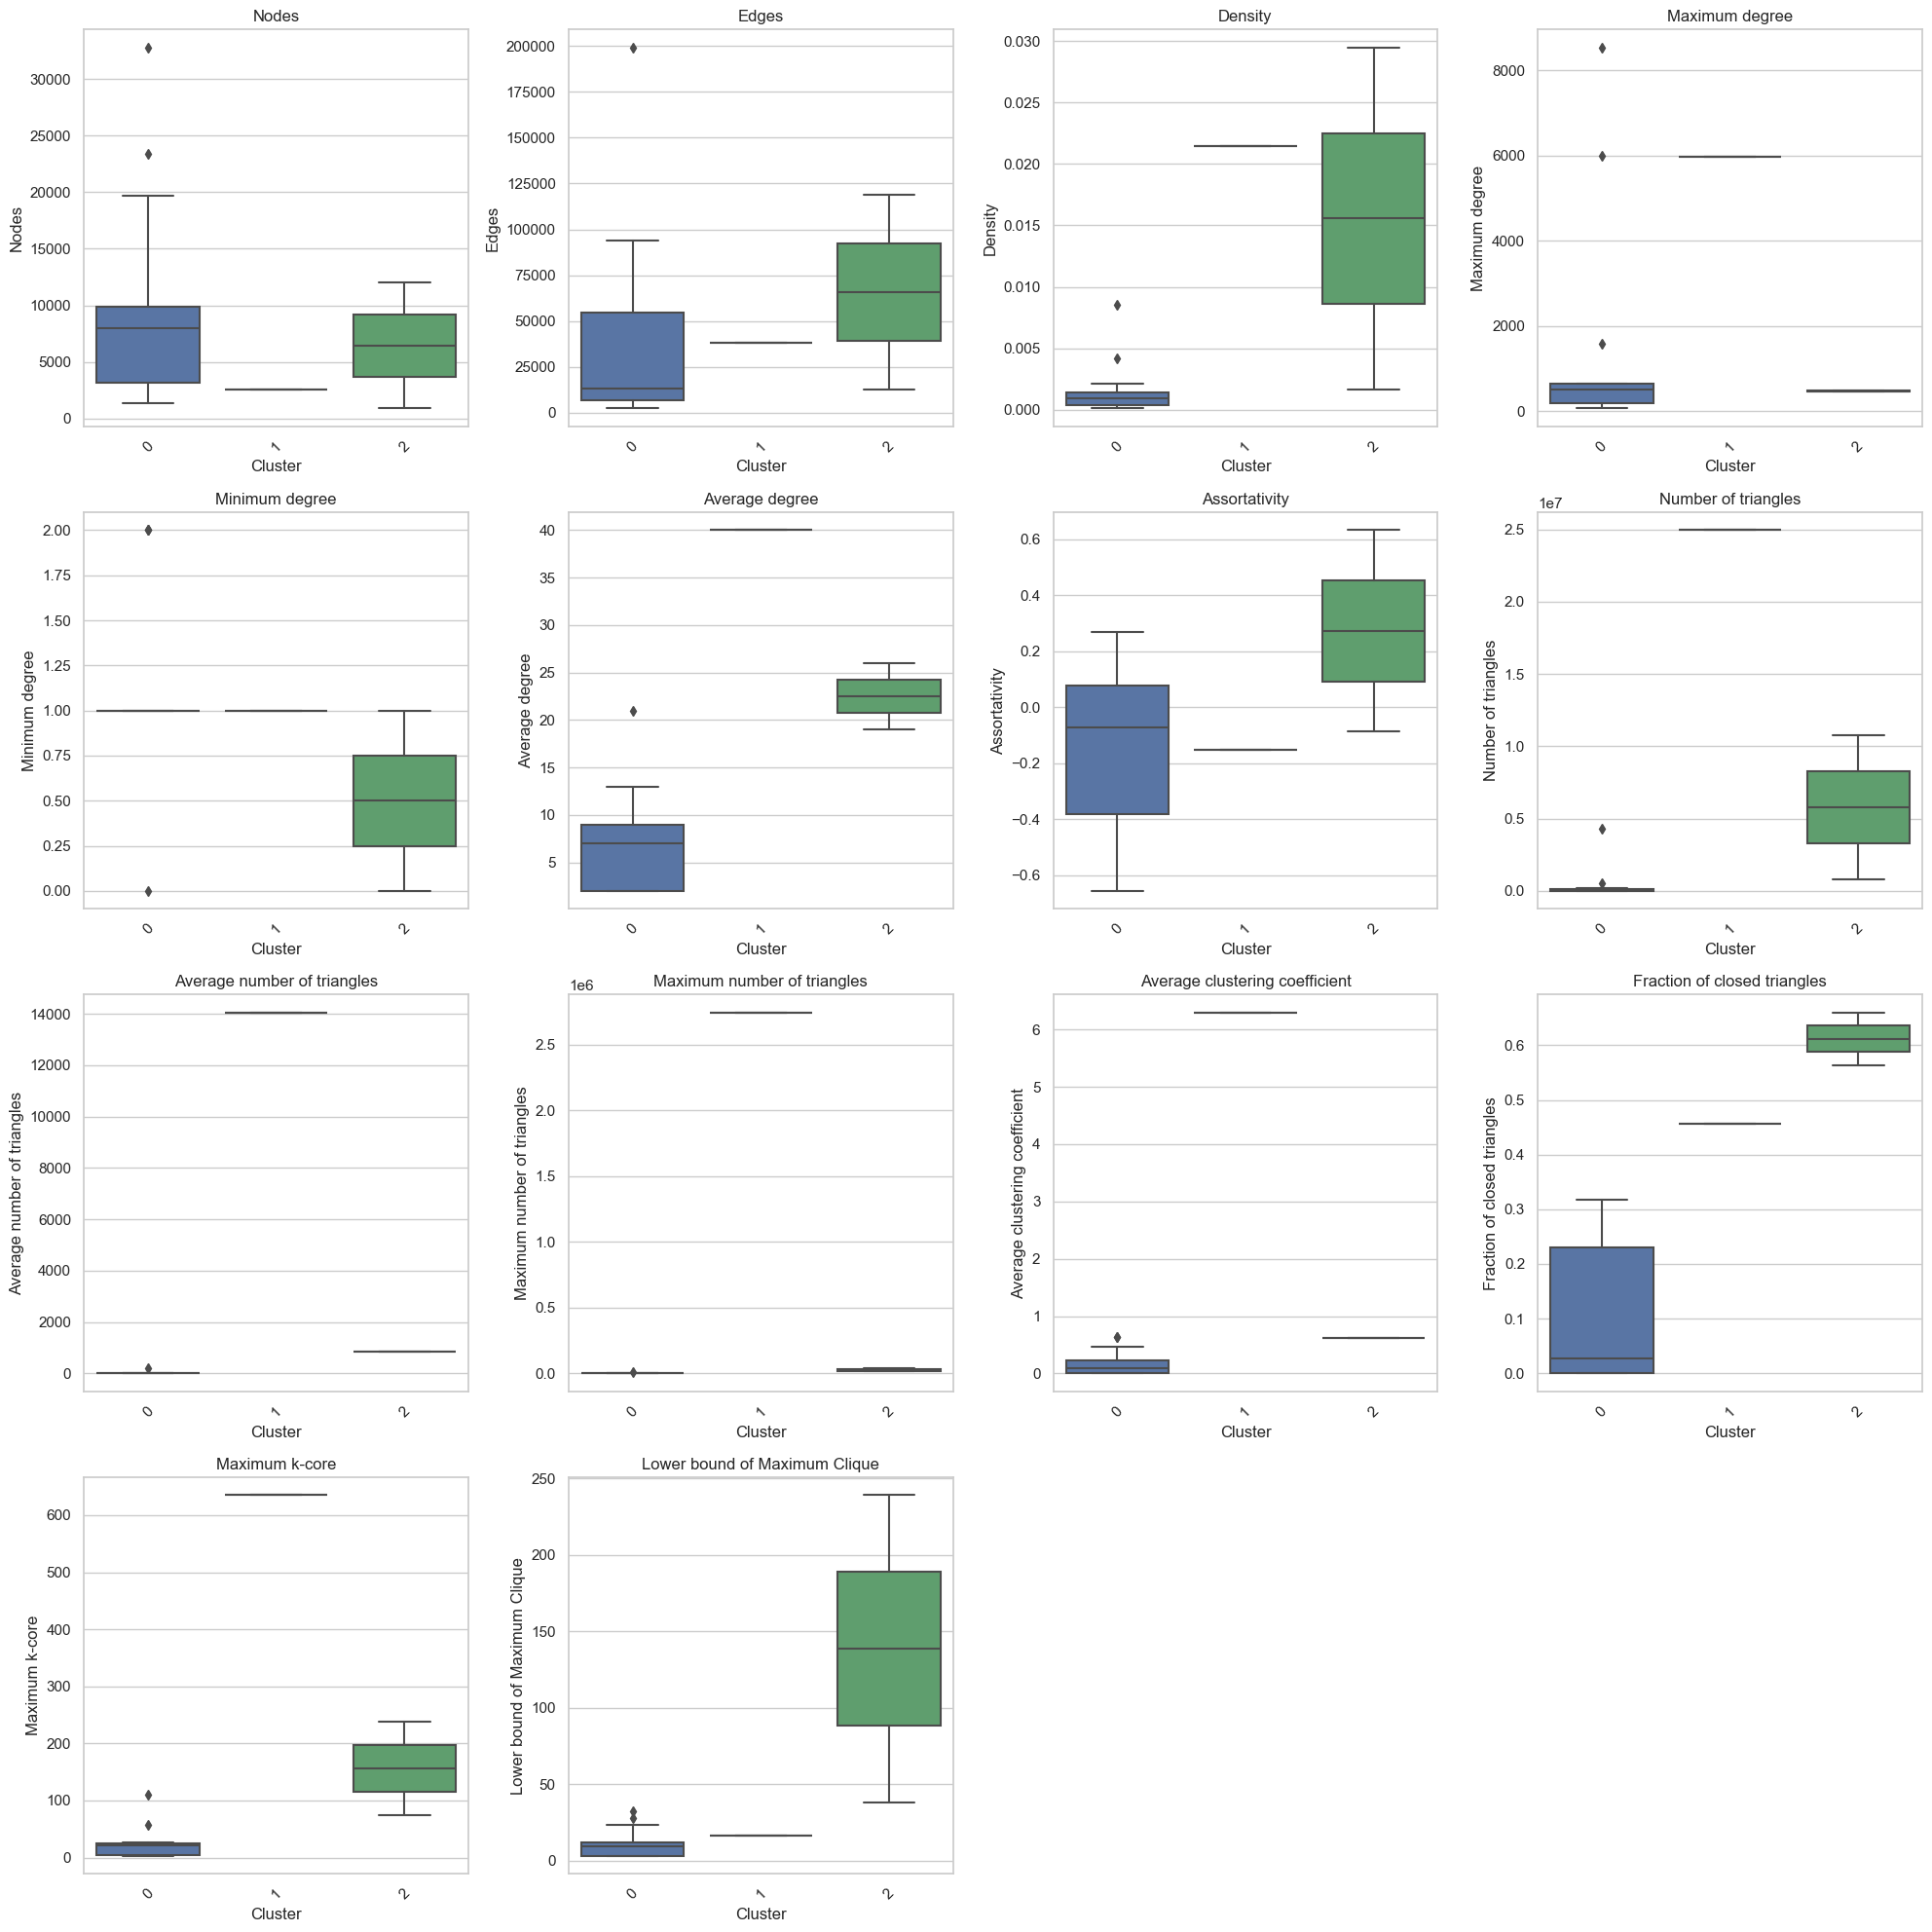

Nodes                                   Edges                \
                 mean          std   min    max          mean           std   
Cluster                                                                       
0        10294.538462  9442.784243  1394  32769  41467.153846  55461.044385   
1         2603.000000          NaN  2603   2603  38258.000000           NaN   
2         6453.000000  7844.642630   906  12000  65840.000000  75060.799037   

                         Density            ... Maximum k-core       \
           min     max      mean       std  ...            min  max   
Cluster                                     ...                       
0         2468  199035  0.001643  0.002333  ...              3  111   
1        38258   38258  0.021483       NaN  ...            635  635   
2        12764  118916  0.015561  0.019682  ...             75  239   

        Lower bound of Maximum Clique                      Adjusted Cluster  \
                                 mean         std min  max             mean   
Cluster                                                                       
0                           11.538462    9.862516   3   32              0.0   
1                           16.000000         NaN  16   16              1.0   
2                          138.500000  142.128463  38  239              1.0   

                           
              std min max  
Cluster                    
0        0.000000   0   0  
1             NaN   1   1  
2        1.414214   0   2  

[3 rows x 60 columns]

In [18]:
# Generating summary statistics for each cluster
cluster_summary = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Visualizing the differences in network properties across clusters using box plots
plt.figure(figsize=(20, 20))
num_plots = len(scale_columns)
num_cols = 4
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

for i, column in enumerate(scale_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

cluster_summary


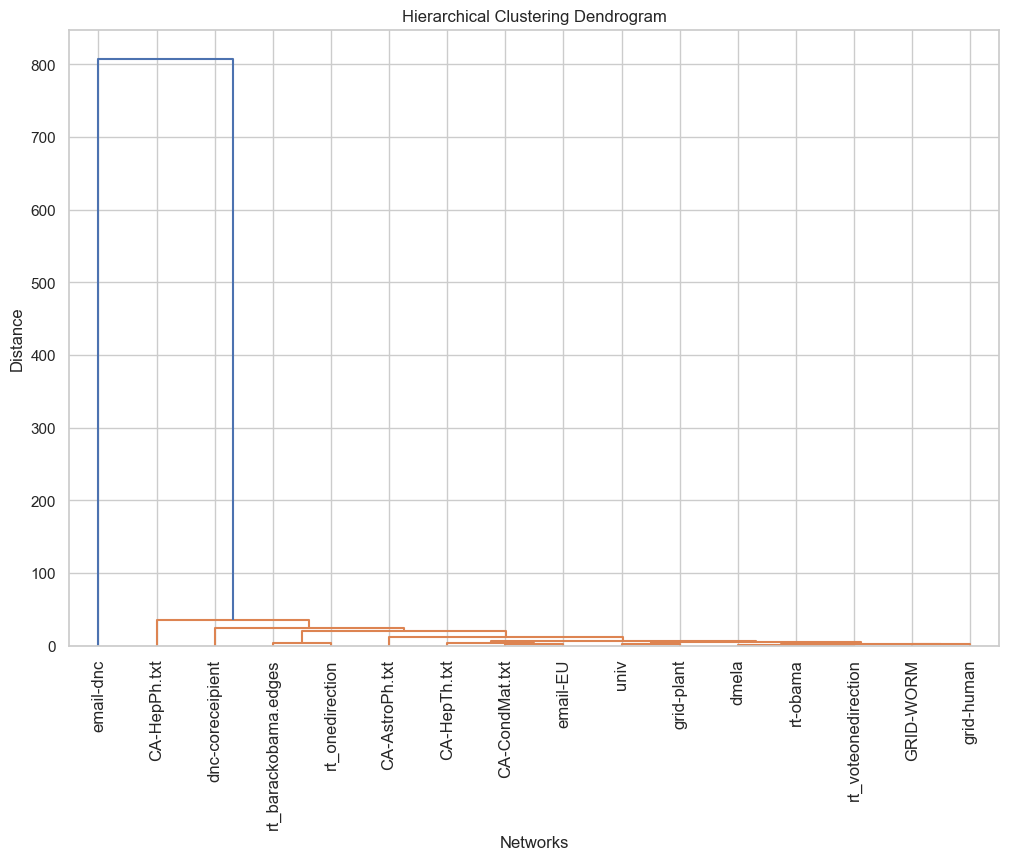

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using the scaled data excluding the 'Network' and 'Type of Network' columns for clustering
data_for_clustering = data_scaled[scale_columns]

# Performing hierarchical clustering
Z = linkage(data_for_clustering, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data_scaled['Network'].tolist(), leaf_rotation=90, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Networks")
plt.ylabel("Distance")
plt.show()


In [20]:
from scipy.cluster.hierarchy import fcluster

# Choosing a cut-off distance to maximize the meaningful separation seen in the dendrogram
# We'll choose a distance that cuts the dendrogram to form approximately 3-4 clusters based on the significant gaps observed
distance_cutoff = 40  # This value is chosen based on the dendrogram visual to form a good balance between cluster count and separation

# Applying the chosen cutoff to form clusters
clusters = fcluster(Z, distance_cutoff, criterion='distance')

# Adding the cluster labels to the data
data_scaled['Cluster'] = clusters
data['Cluster'] = clusters

# Display the first few rows of the updated data to verify clustering
data_scaled[['Network', 'Type of Network', 'Cluster']], data[['Network', 'Type of Network', 'Cluster']]


(                 Network Type of Network  Cluster
 0         CA-CondMat.txt   Collaboration        1
 1           CA-HepPh.txt   Collaboration        1
 2         CA-AstroPh.txt   Collaboration        1
 3           CA-HepTh.txt   Collaboration        1
 4               rt-obama         Retweet        1
 5   rt_barackobama.edges         Retweet        1
 6        rt_onedirection         Retweet        1
 7    rt_voteonedirection         Retweet        1
 8               email-EU           Email        1
 9              email-dnc           Email        2
 10                  univ           Email        1
 11      dnc-coreceipient           Email        1
 12                 dmela         Biology        1
 13             GRID-WORM         Biology        1
 14            grid-human         Biology        1
 15            grid-plant         Biology        1,
                  Network Type of Network  Cluster
 0         CA-CondMat.txt   Collaboration        1
 1           CA-HepPh.txt   Co

In [21]:
import hdbscan

# Applying HDBSCAN
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, cluster_selection_epsilon=0.5)

# Fit the model
clusters_hdbscan = hdbscan_cluster.fit_predict(data_for_clustering)

# Adding the HDBSCAN cluster labels to the data
data_scaled['HDBSCAN_Cluster'] = clusters_hdbscan
data['HDBSCAN_Cluster'] = clusters_hdbscan

# Displaying the updated data with HDBSCAN cluster labels
data[['Network', 'Type of Network', 'Cluster', 'HDBSCAN_Cluster']].head(), clusters_hdbscan


ModuleNotFoundError: No module named 'hdbscan'

In [22]:
pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.37-py2.py3-none-any.whl (989 kB)
Failed to build hdbscan
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [40 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-39\hdbscan
  creating build\lib.win-amd64-cpython-39\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-cpython-39\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-39\hdbscan\tests
  copying 